<a href="https://colab.research.google.com/github/farhath01/Online-News-Popularity/blob/main/ITM760_Final_Project_(Popularity).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split

from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

from sklearn import tree
from IPython.display import Image

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
news = pd.read_csv('/content/drive/MyDrive/ITM 760/Final Project/online_news_popularity.csv')

# Data Exploration


---



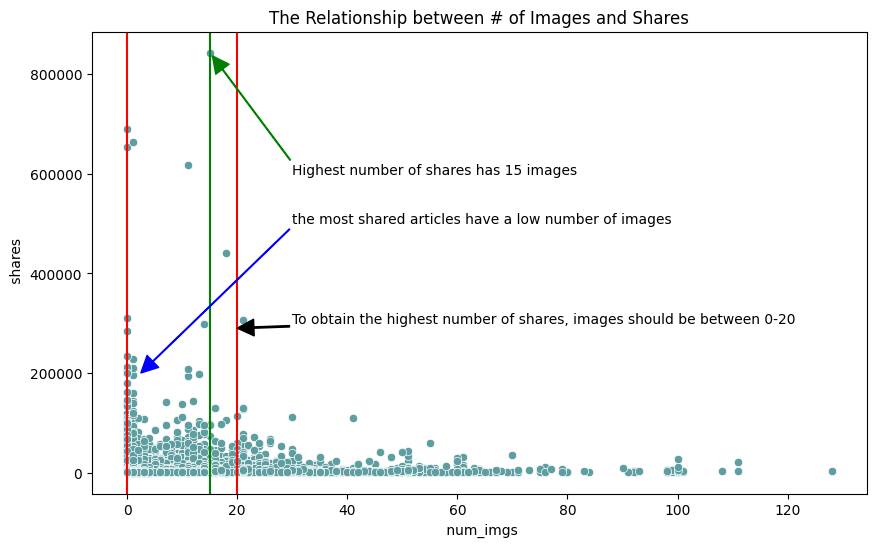

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(y=' shares', x=' num_imgs', data=news, color ='cadetblue')
plt.title('The Relationship between # of Images and Shares')

import matplotlib.pyplot as plt
import numpy as np

plt.axvline(x = 20, color = 'r', label = 'axvline - full height')
plt.annotate('To obtain the highest number of shares, images should be between 0-20',xytext = (30,300000),
             arrowprops=dict(color = 'k', width=1),xy=(20,290000))
plt.axvline(x = 0, color = 'r', label = 'axvline - full height')

plt.axvline(x = 15, color = 'g', label = 'axvline - full height')
plt.annotate('Highest number of shares has 15 images',xytext = (30,600000),
             arrowprops=dict(color = 'g', width=0.5),xy=(15.5,836666))

plt.annotate('the most shared articles have a low number of images',xytext = (30,500000),
             arrowprops=dict(color = 'b', width=0.5),xy=(2.5,200000))
plt.show()

<ipython-input-144-d85ae2769c80>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.scatterplot(y=' shares', x=' kw_max_min', data=news,palette='muted');


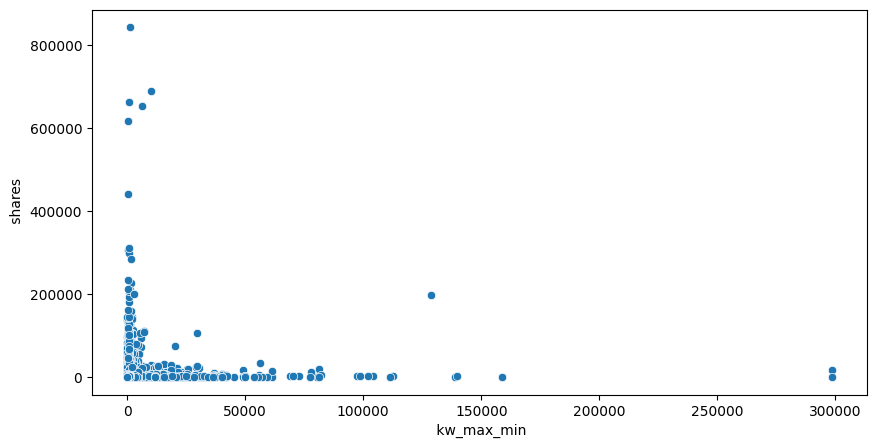

In [ ]:
# Number of words in title vs Number of shares

plt.figure(figsize=(10,5))
ax = sns.scatterplot(y=' shares', x=' kw_max_min', data=news,palette='muted');

# Data Cleaning


---



In [ ]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [ ]:
news

In [ ]:
news.head()

url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  ...  \
0                   0.815385         4.0              2.0        1.0  ...   
1                   0.791946         3.0              1.0        1.0  ...   
2                   0.663866         3.0              1.0        1.0  ...   
3                   0.665635         9.0              0.0        1.0  ...   
4                   0.540890        19.0             19.0       20.0  ...   

    min_positive_polarity   max_positive_polarity   avg_negative_polarity  \
0                0.100000                     0.7               -0.350000   
1                0.033333                     0.7               -0.118750   
2                0.100000                     1.0               -0.466667   
3                0.136364                     0.8               -0.369697   
4                0.033333                     1.0               -0.220192   

    min_negative_polarity   max_negative_polarity   title_subjectivity  \
0                  -0.600               -0.200000             0.500000   
1                  -0.125               -0.100000             0.000000   
2                  -0.800               -0.133333             0.000000   
3                  -0.600               -0.166667             0.000000   
4                  -0.500               -0.050000             0.454545   

    title_sentiment_polarity   abs_title_subjectivity  \
0                  -0.187500                 0.000000   
1                   0.000000                 0.500000   
2                   0.000000                 0.500000   
3                   0.000000                 0.500000   
4                   0.136364                 0.045455   

    abs_title_sentiment_polarity   shares  
0                       0.187500      593  
1                       0.000000      711  
2                       0.000000     1500  
3                       0.000000     1200  
4                       0.136364      505  

[5 rows x 61 columns]

In [ ]:
#checking for missing values
n=news.isna().sum()
n[n>0]

Series([], dtype: int64)

In [ ]:
#Identifying categorical and continuos variables

categorical = news.select_dtypes(include=['object'])

for i in categorical:
    column = categorical[i]
    print('Variable: {} '.format(i,column.nunique()))

Variable: url 


In [ ]:
news = news.drop_duplicates()

In [ ]:
news.shape

(39644, 61)

null values are yellow


<Axes: >

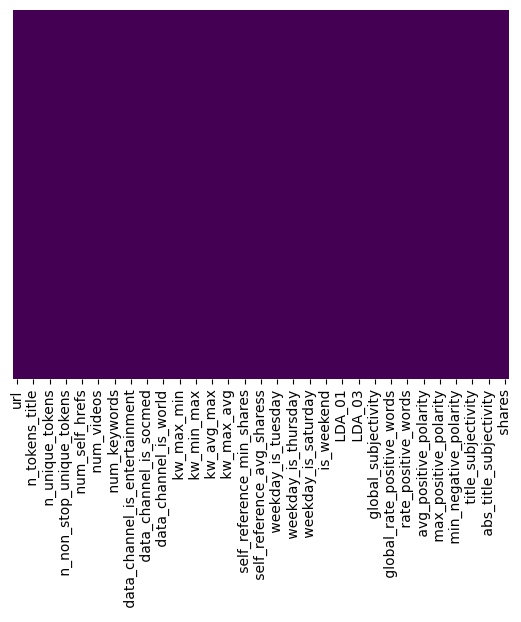

In [ ]:
#null values

print('null values are yellow')
sns.heatmap(news.isnull(),yticklabels=False,cbar=False,cmap='viridis')

there are no duplicates, no missing values, and no null *values*

---

In [ ]:
#Detecting Outliers

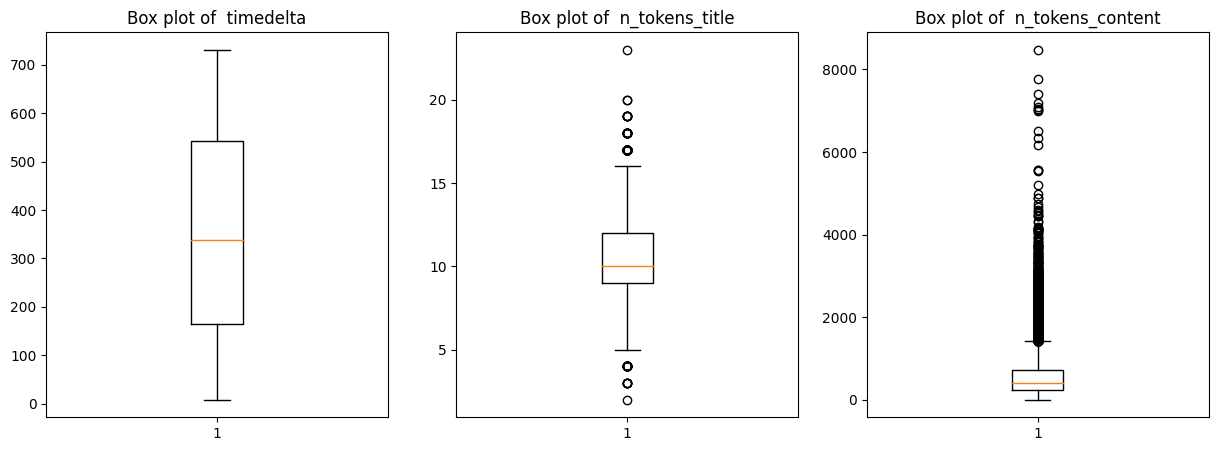

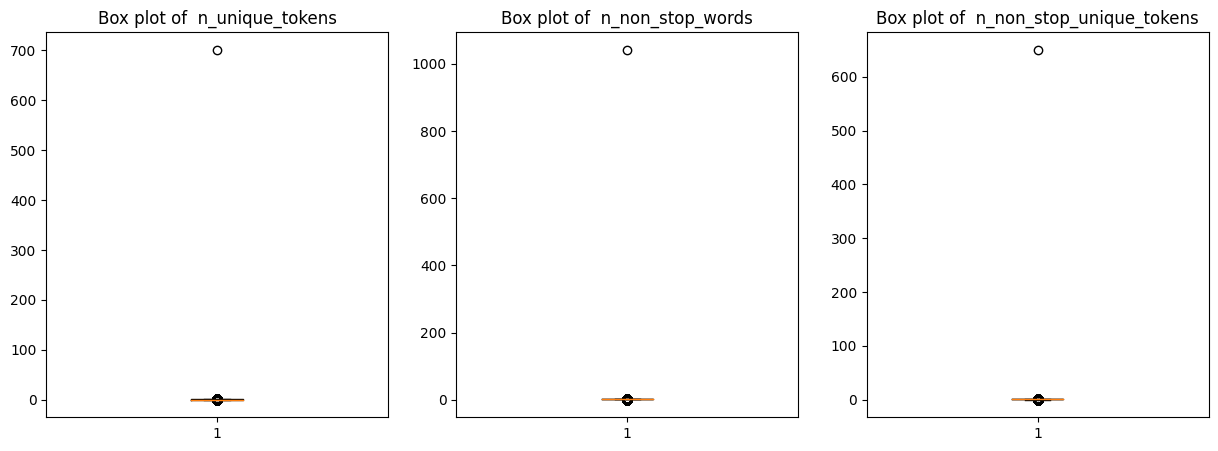

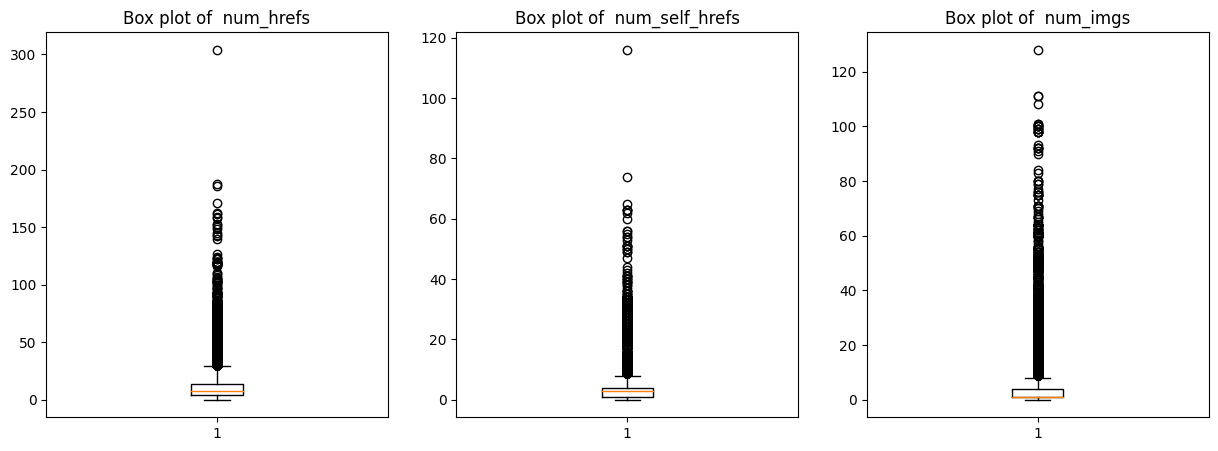

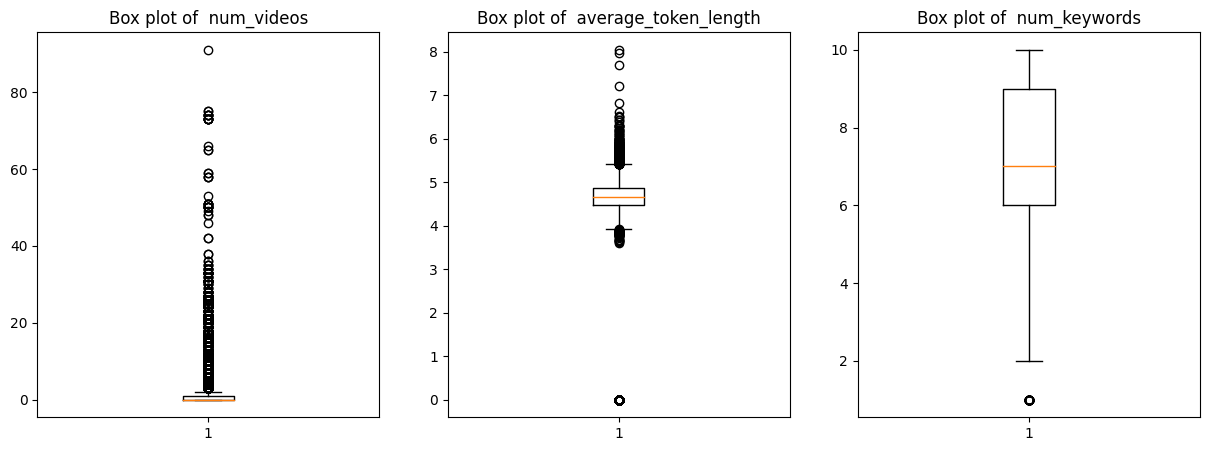

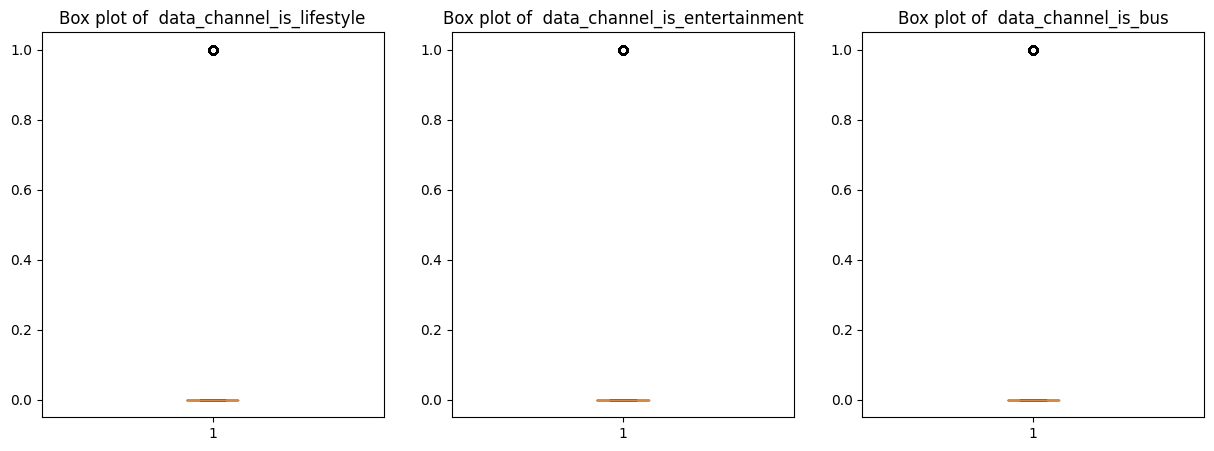

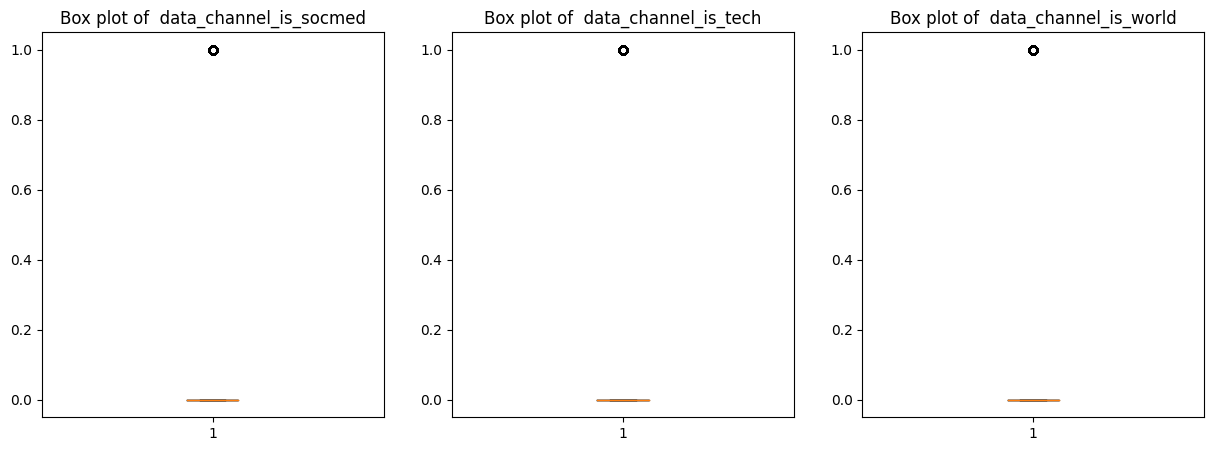

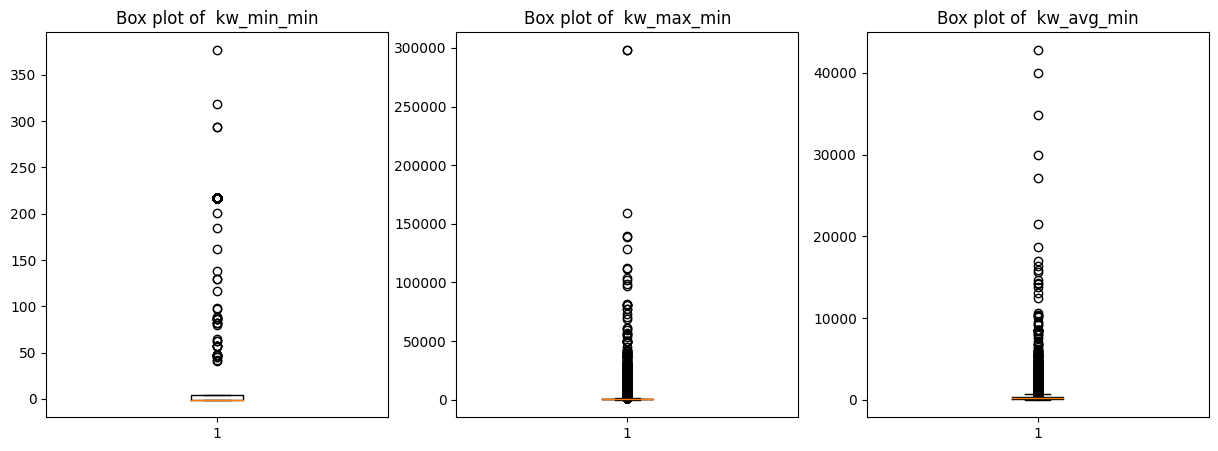

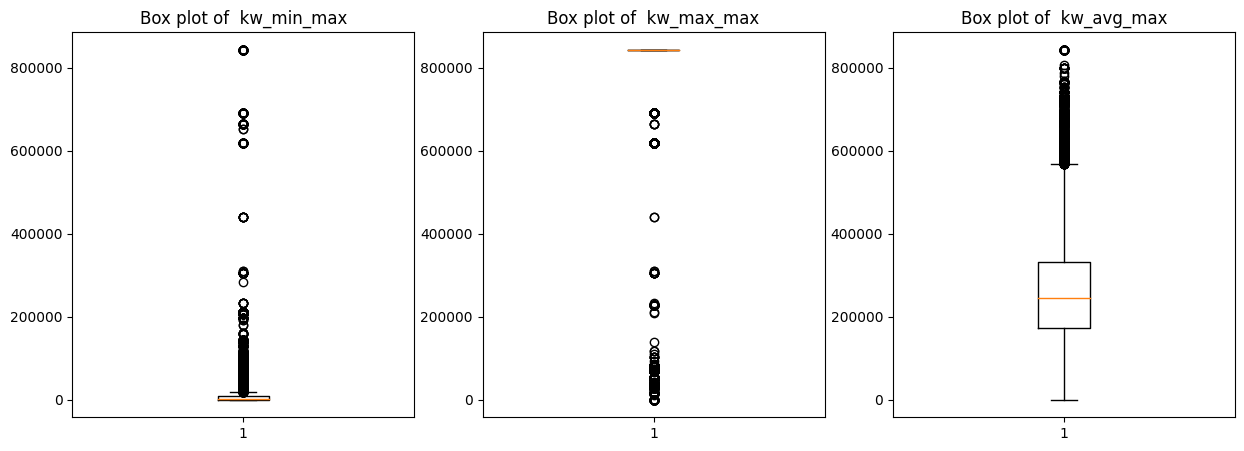

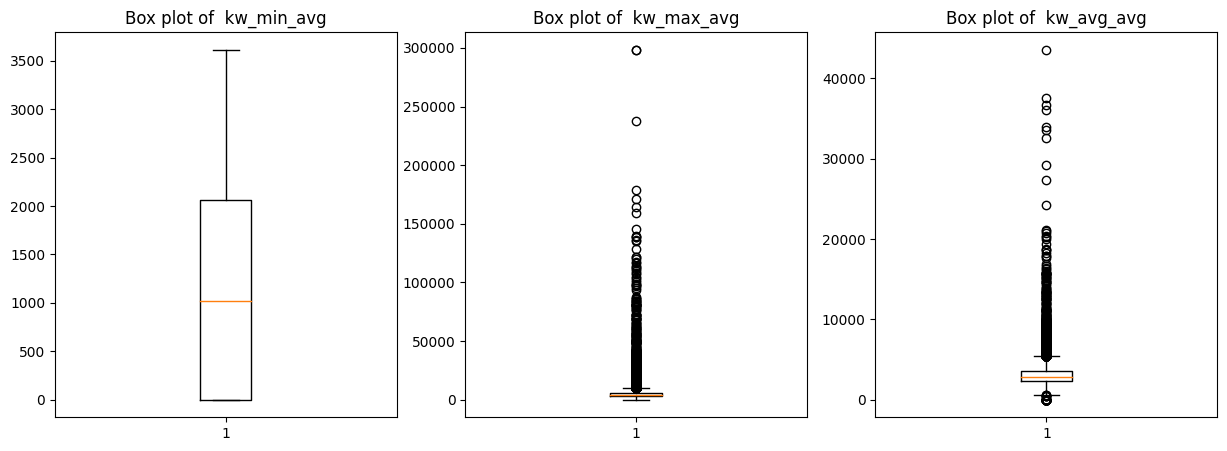

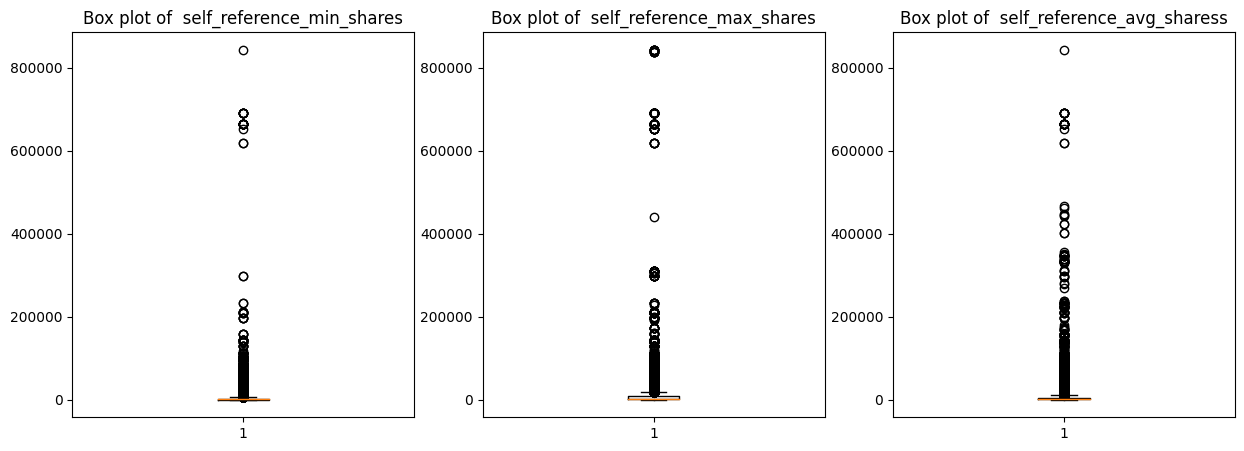

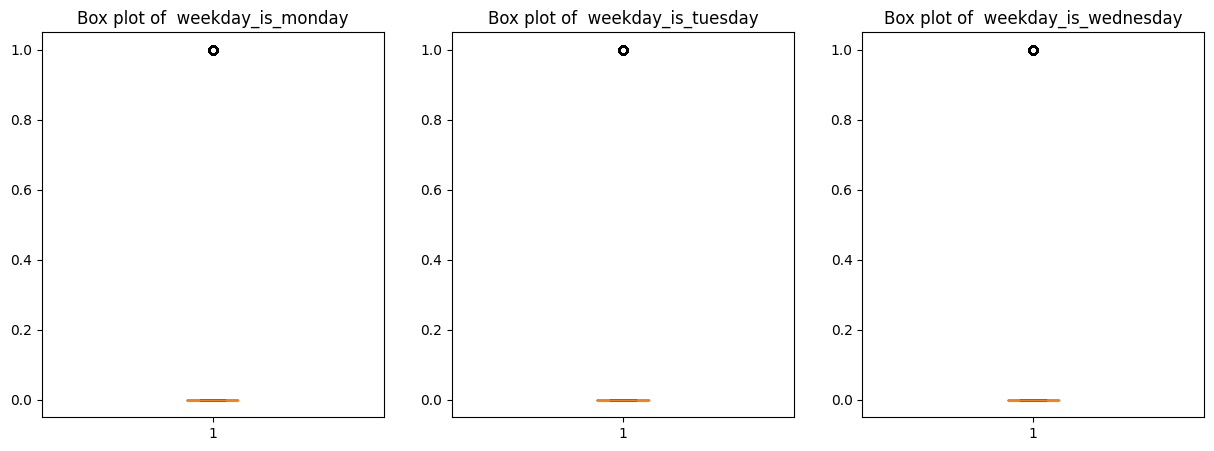

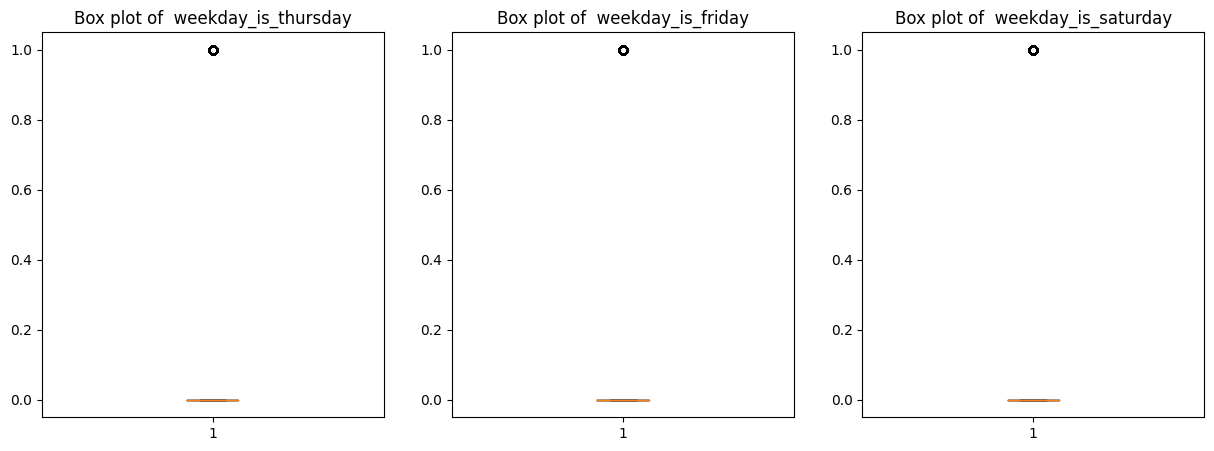

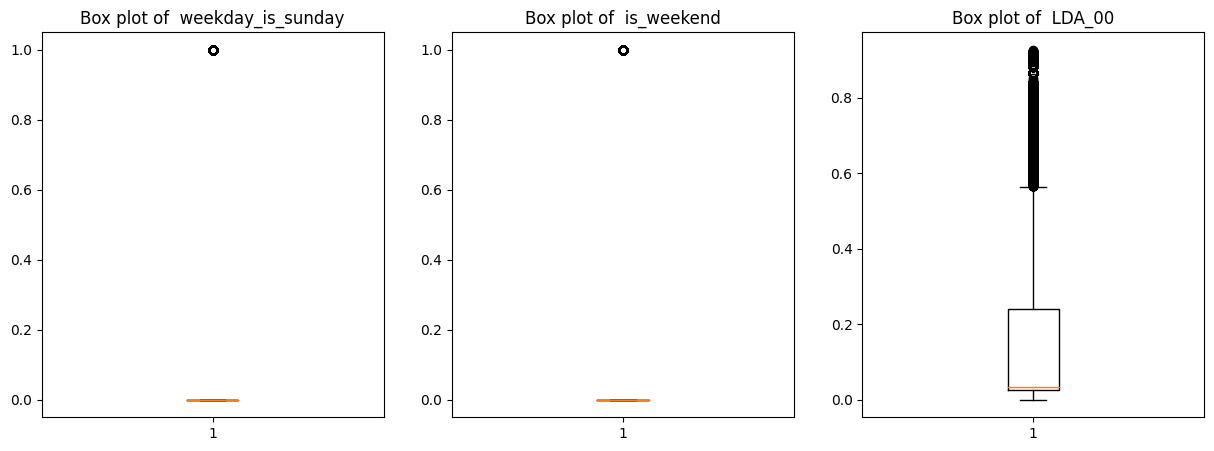

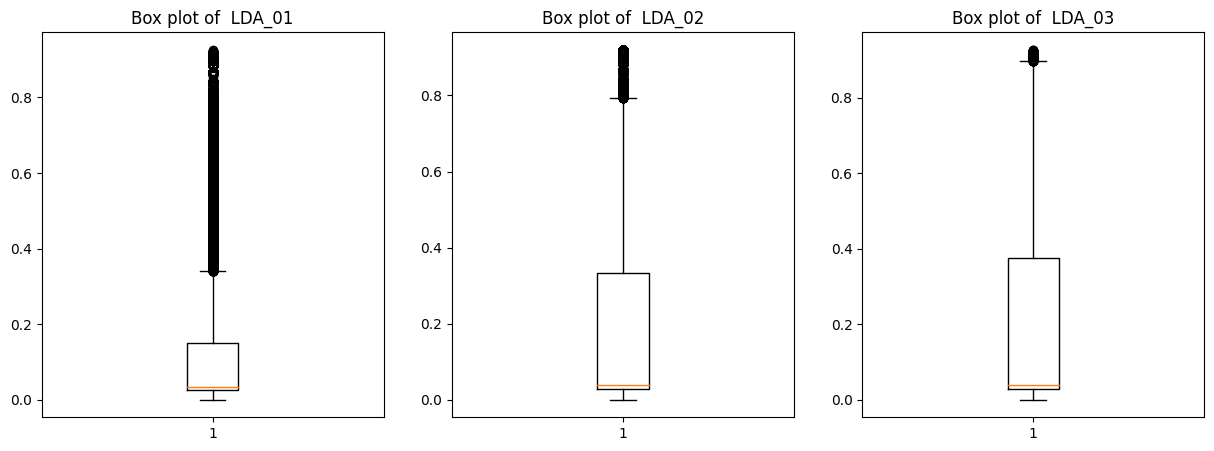

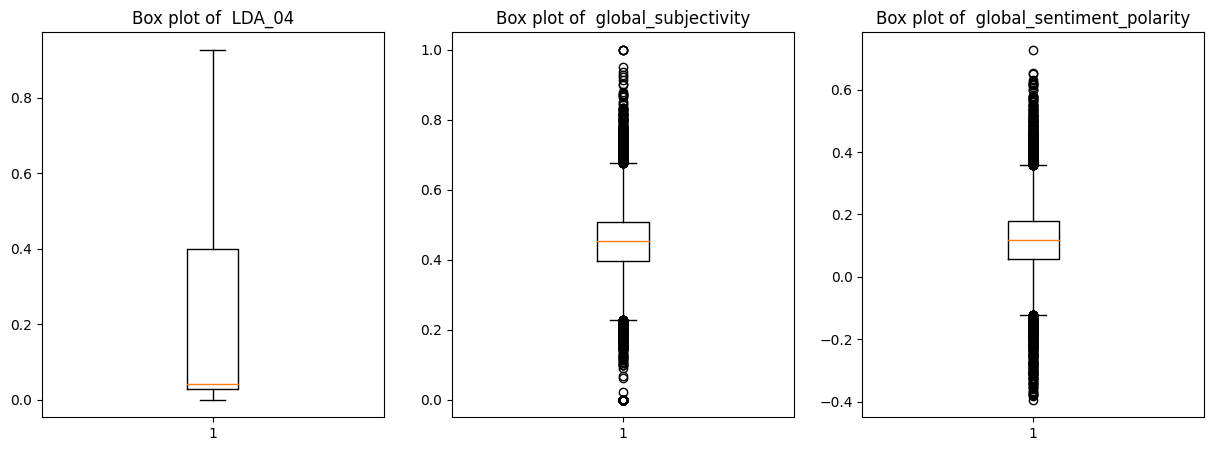

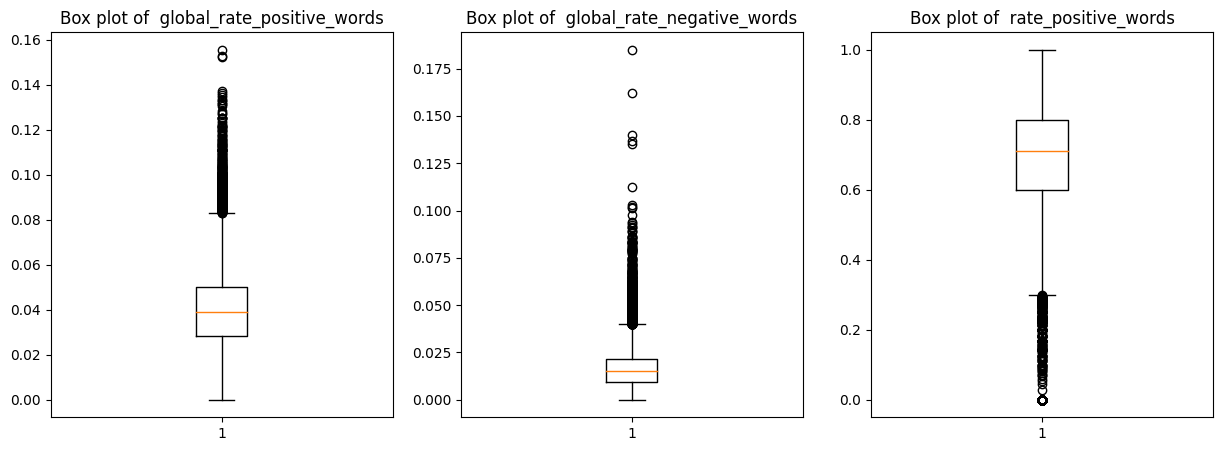

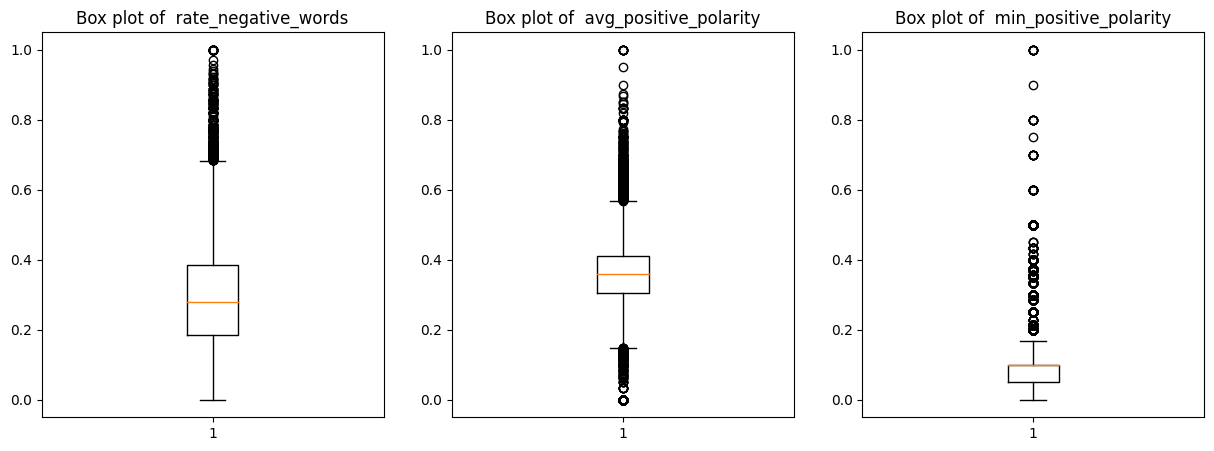

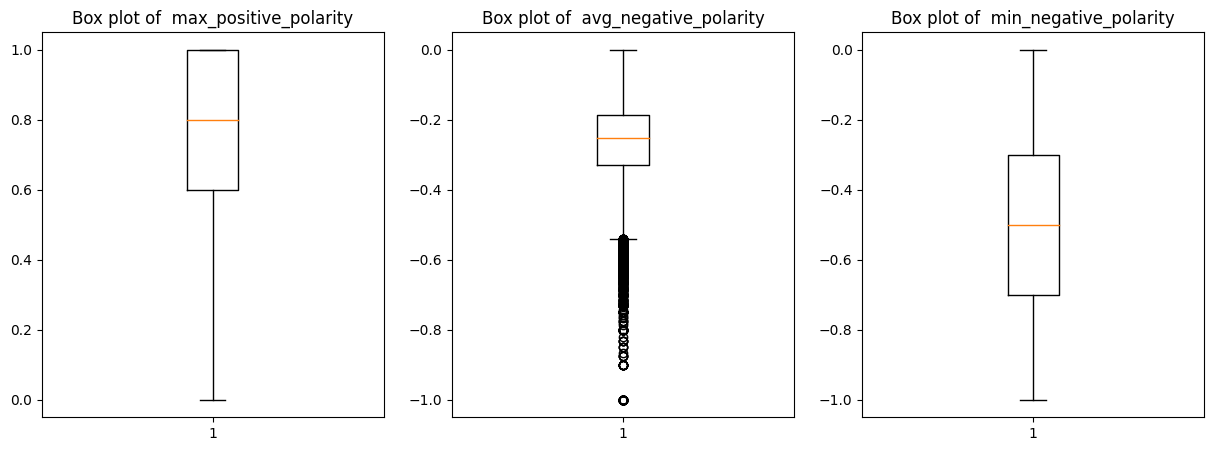

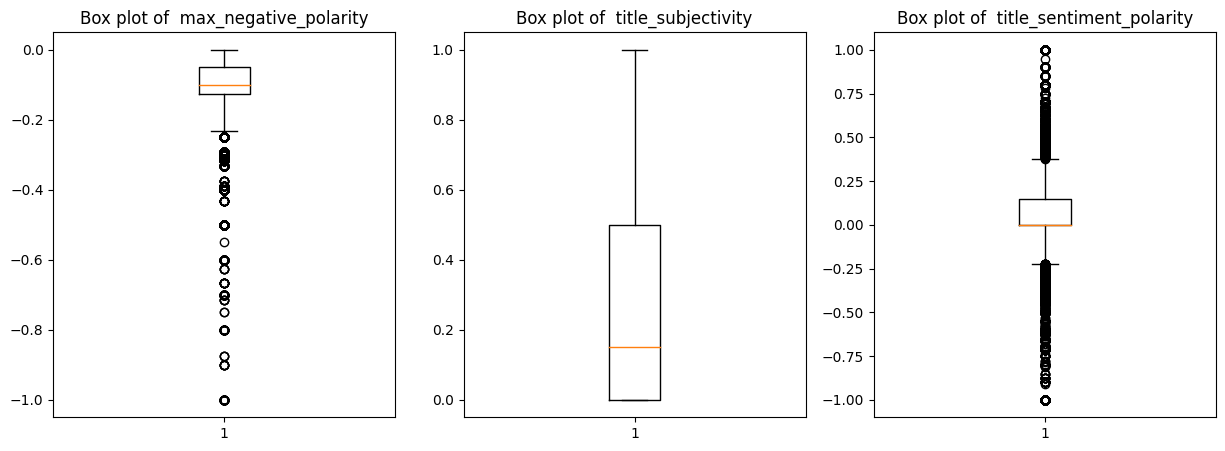

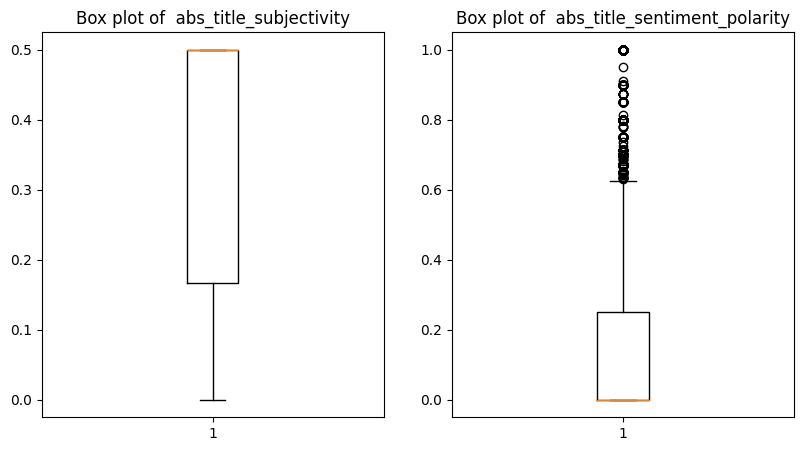

In [ ]:
col = news.drop(['url', ' shares'], axis=1).columns

i=0

while i < len(col):

    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    plt.boxplot(news[col[i]])
    title = 'Box plot of ' + str(col[i])
    plt.title(title)
    
    
    if i+1 < len(col):
        plt.subplot(1,3,2)
        plt.boxplot(news[col[i+1]])
        title = 'Box plot of ' +  str(col[i+1])
        plt.title(title)

    if i+2 < len(col):
        plt.subplot(1,3,3)
        plt.boxplot(news[col[i+2]])
        title = 'Box plot of ' +  str(col[i+2])
        plt.title(title)

    i+=3
    
plt.show()

In [ ]:
def outliersinColumns(df):
    
    columns_outliers = []
    for column in df.columns:

        if news[column].nunique() > 2:  #Apply for variables with 3 or more unique values

            for value in df[column]:
                if value:
                    columns_outliers.append(column)
                    break

    return columns_outliers

In [ ]:
Q1 = news.quantile(0.25)
Q3 = news.quantile(0.75)
IQR = Q3 - Q1

# False means these values are not outliers
# True they are an outlier
notinvalidarea = (news < (Q1 - 1.5 * IQR)) | (news > (Q3 + 1.5 * IQR))

columns_w_outliers = outliersinColumns(notinvalidarea)

# Printing Results
print('Columns that contain outliers: {}'.format(len(columns_w_outliers)))
print('\n')
print(columns_w_outliers)

<ipython-input-154-8b331fb2c5db>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = news.quantile(0.25)
<ipython-input-154-8b331fb2c5db>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = news.quantile(0.75)
<ipython-input-154-8b331fb2c5db>:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  notinvalidarea = (news < (Q1 - 1.5 * IQR)) | (news > (Q3 + 1.5 * IQR))


Columns that contain outliers: 39


[' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' abs_title_sentiment_polarity', ' average_token_length', ' avg_negative_polarity', ' avg_positive_polarity', ' global_rate_negative_words', ' global_rate_positive_words', ' global_sentiment_polarity', ' global_subjectivity', ' kw_avg_avg', ' kw_avg_max', ' kw_avg_min', ' kw_max_avg', ' kw_max_max', ' kw_max_min', ' kw_min_max', ' kw_min_min', ' max_negative_polarity', ' min_positive_polarity', ' n_non_stop_unique_tokens', ' n_non_stop_words', ' n_tokens_content', ' n_tokens_title', ' n_unique_tokens', ' num_hrefs', ' num_imgs', ' num_keywords', ' num_self_hrefs', ' num_videos', ' rate_negative_words', ' rate_positive_words', ' self_reference_avg_sharess', ' self_reference_max_shares', ' self_reference_min_shares', ' shares', ' title_sentiment_polarity']


In [ ]:
#    1 - log transformation,
#    2 - one-way winsorization to the highest end,
#    3 - one-way winsorization to the lowest end,
#    4 - two-way winsorization

t = {' n_tokens_title':4, ' n_tokens_content':2, ' n_unique_tokens':4, ' n_non_stop_words':3, ' n_non_stop_unique_tokens':4, 
 ' num_hrefs':2, ' num_self_hrefs':2, ' num_imgs':1, ' num_videos':2, ' average_token_length':4, 
 ' num_keywords':3, ' kw_min_min':2, ' kw_max_min':2, ' kw_avg_min':2, ' kw_min_max':2, ' kw_max_max':3,
 ' kw_avg_max':2, ' kw_max_avg':2, ' kw_avg_avg':4, ' self_reference_min_shares':2, ' self_reference_max_shares':2, 
 ' self_reference_avg_sharess':2, ' LDA_00':1, ' LDA_01':1, ' LDA_02':1, ' LDA_03':1, ' global_subjectivity':4, 
 ' global_sentiment_polarity':4, ' global_rate_positive_words':2, ' global_rate_negative_words':2, 
 ' rate_positive_words':3, ' rate_negative_words':2, ' avg_positive_polarity':4, ' min_positive_polarity':2, 
 ' avg_negative_polarity':3, ' max_negative_polarity':3, ' title_sentiment_polarity':4, ' abs_title_sentiment_polarity':2}

In [ ]:
from scipy.stats.mstats import winsorize
news[' n_tokens_content'] = winsorize(news[' n_tokens_content'],(0,0.10))

In [ ]:
from scipy.stats.mstats import winsorize
for k in t:
    if t[k] == 1:
        news[k] = np.log(news[k])
        
    elif t[k] == 2:
        news[k] = winsorize(news[k],(0,0.10))

    elif t[k] == 3:
        news[k] = winsorize(news[k],(0.10,0))
        
    elif t[k] == 4:
        news[k] = winsorize(news[k],(0.10,0.10))

/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


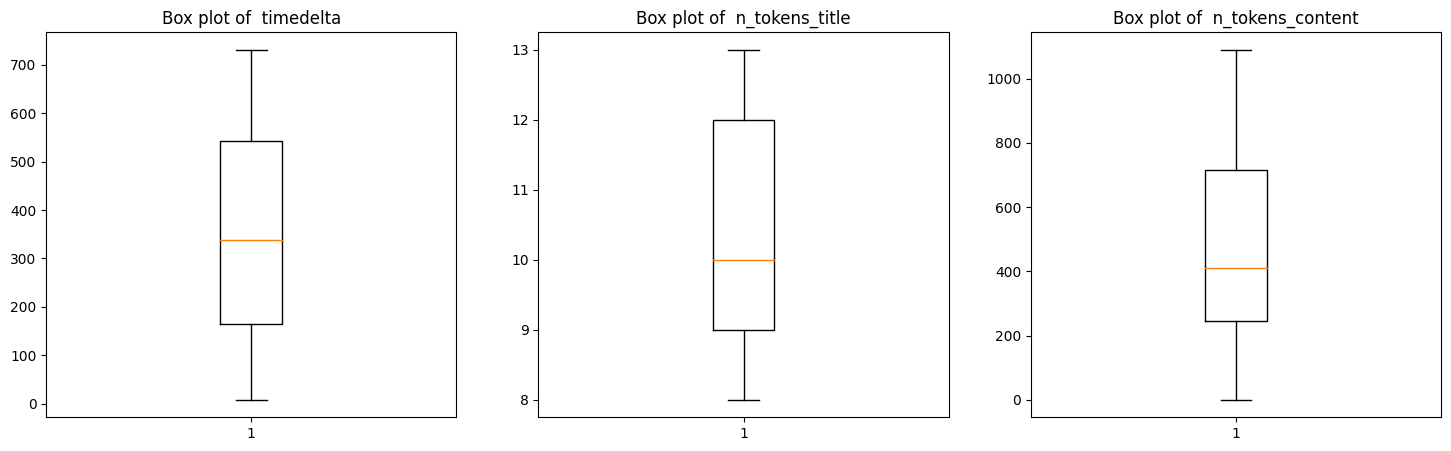

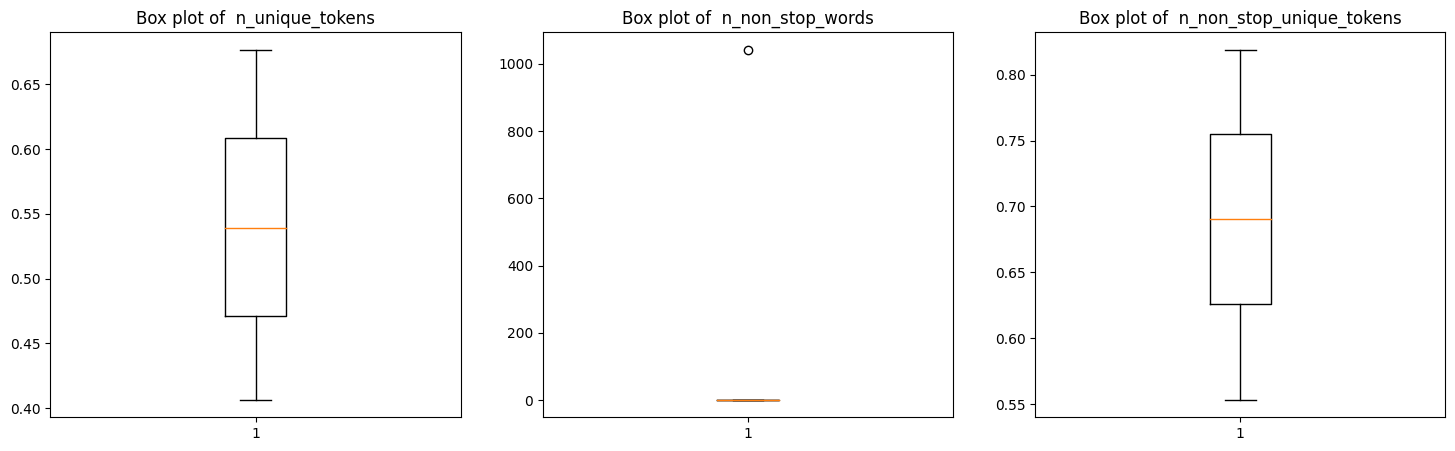

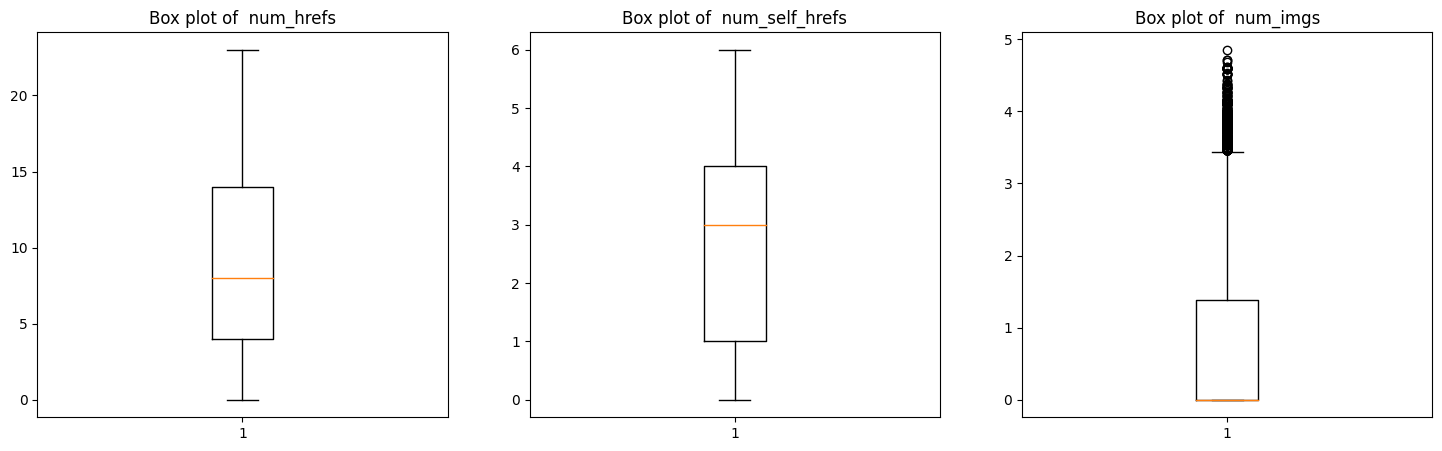

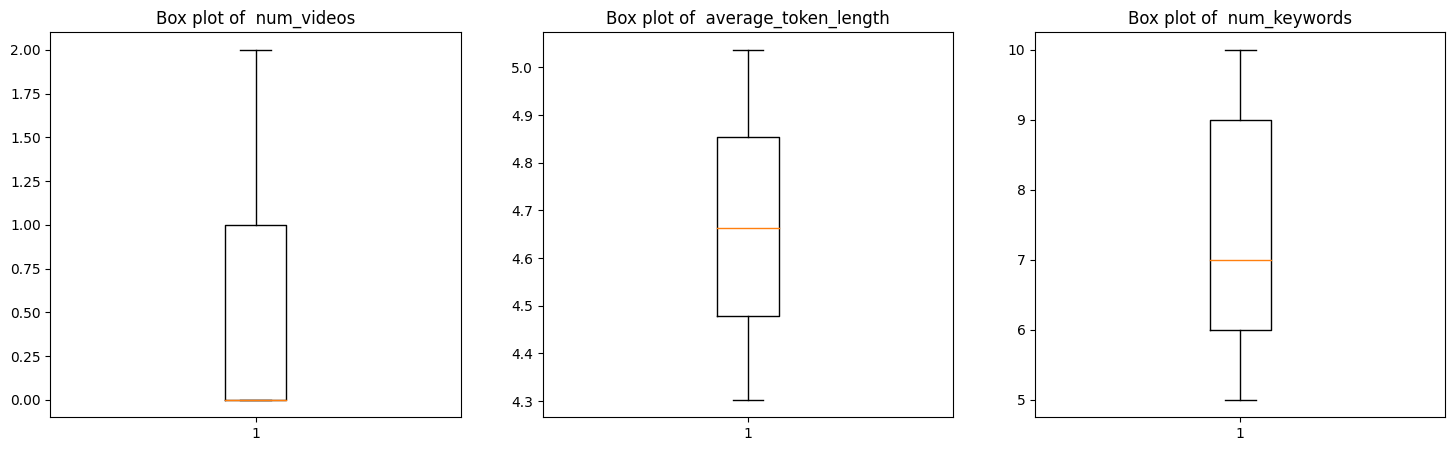

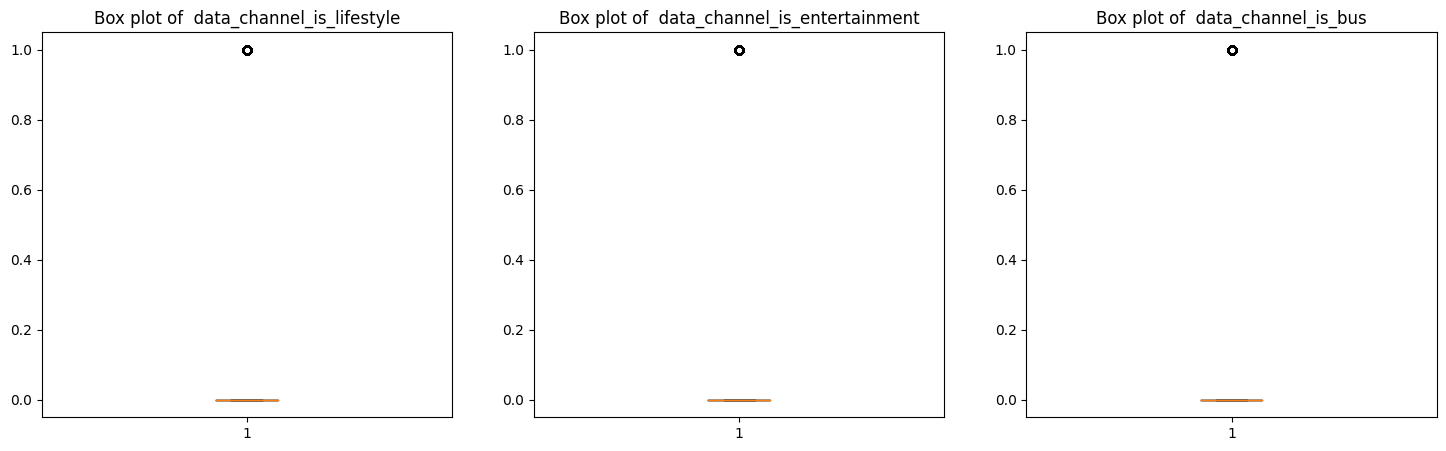

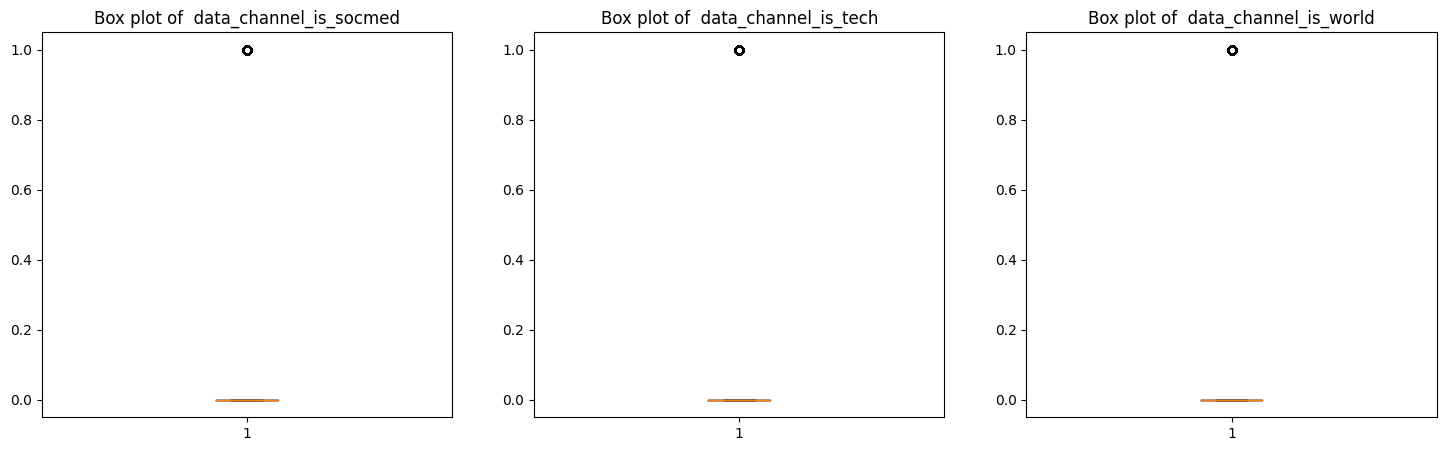

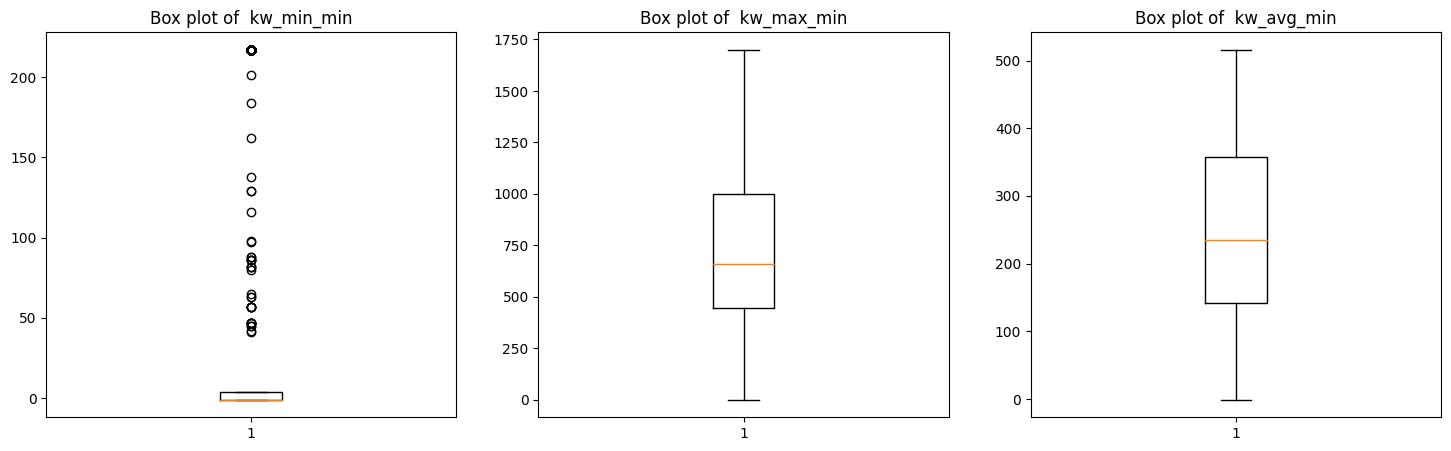

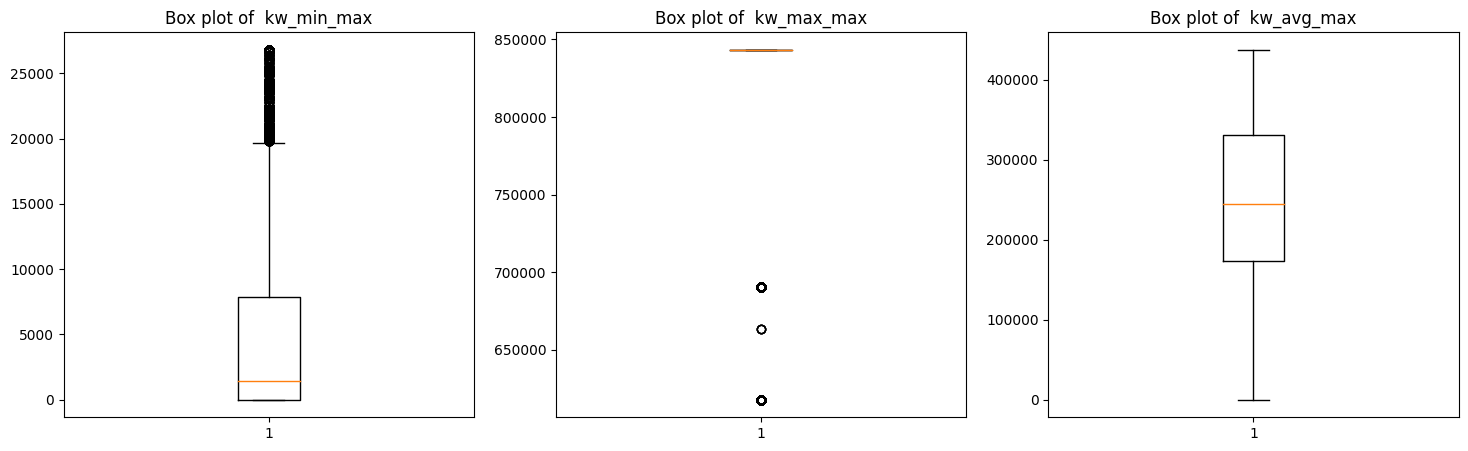

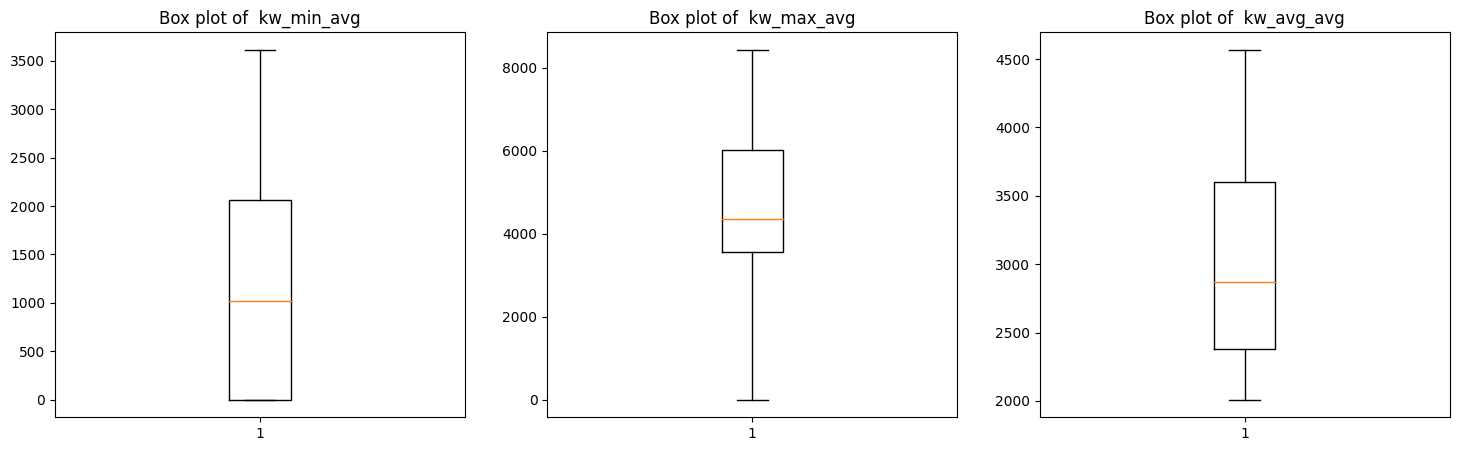

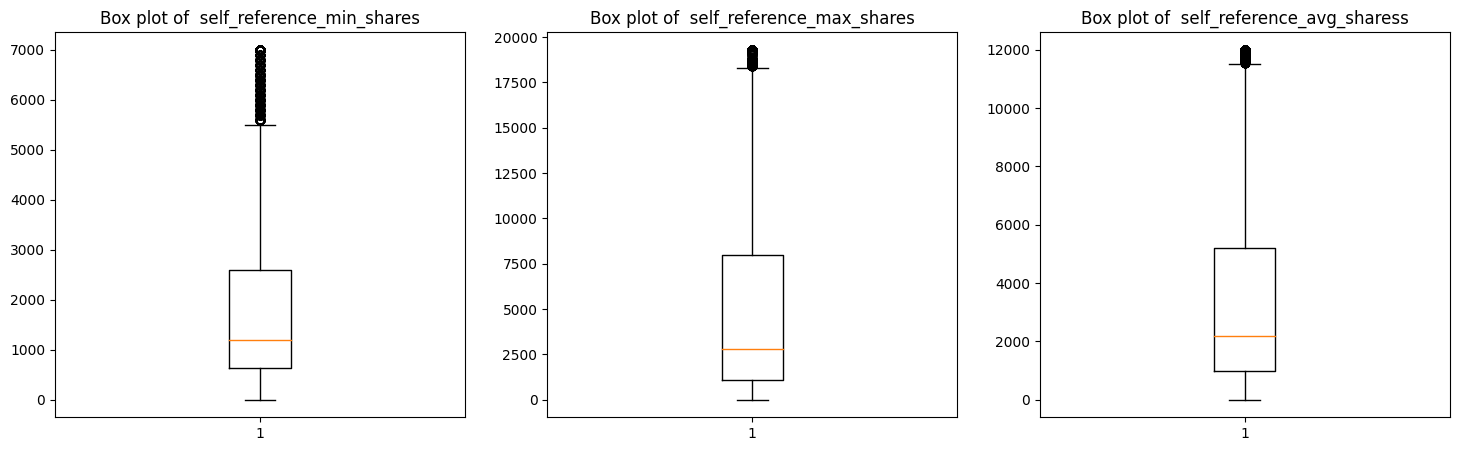

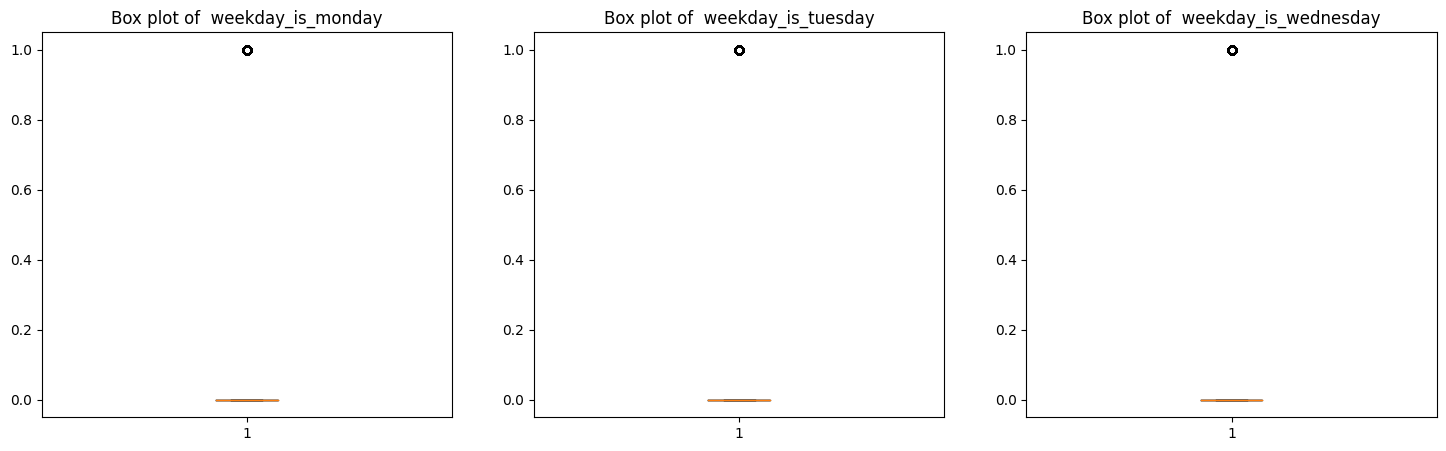

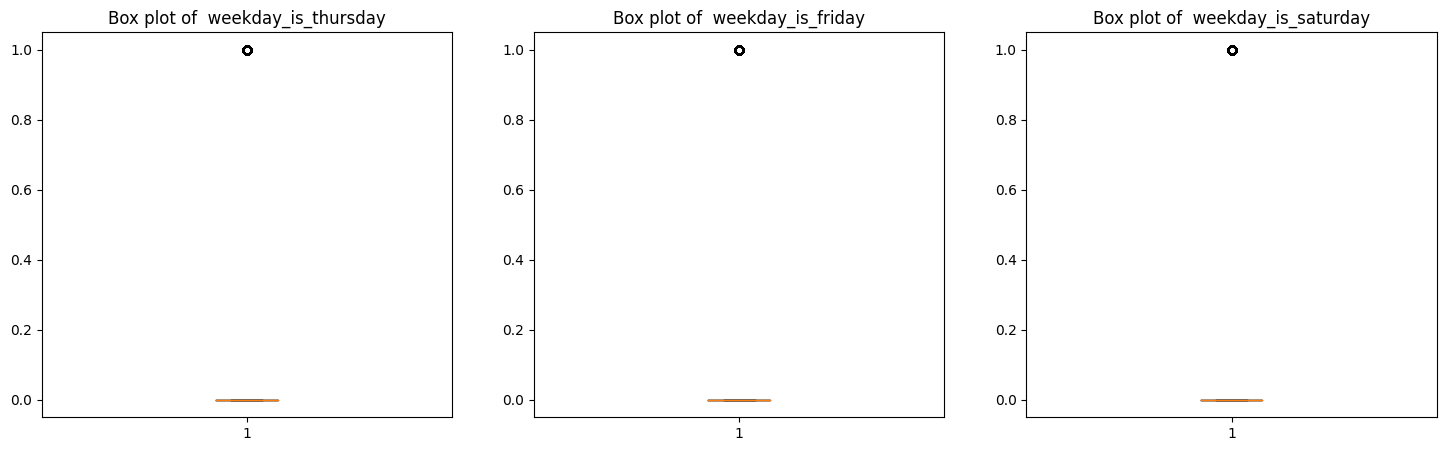

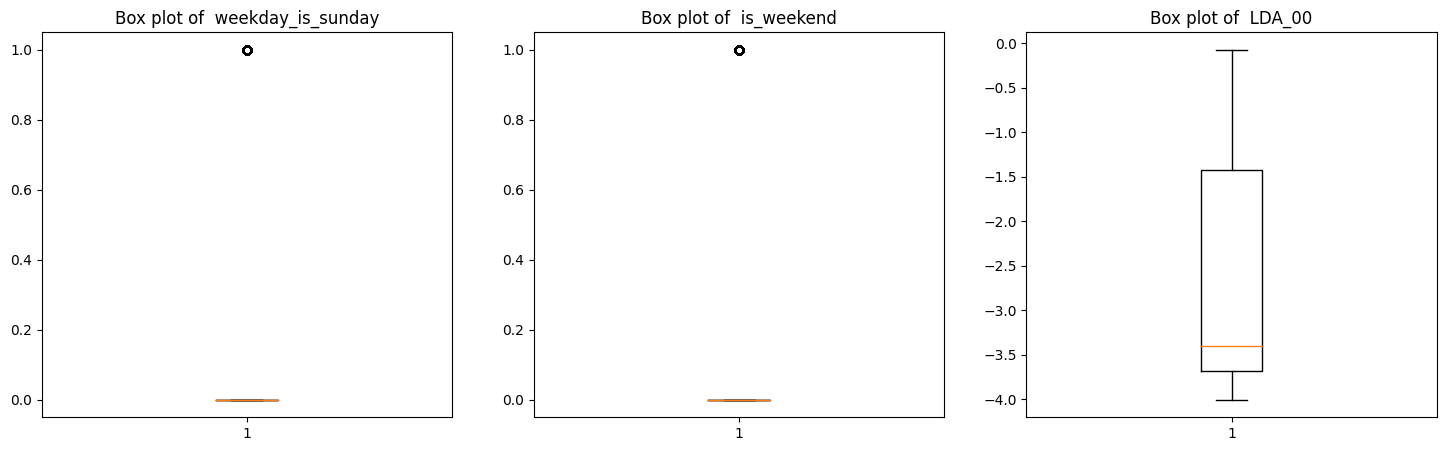

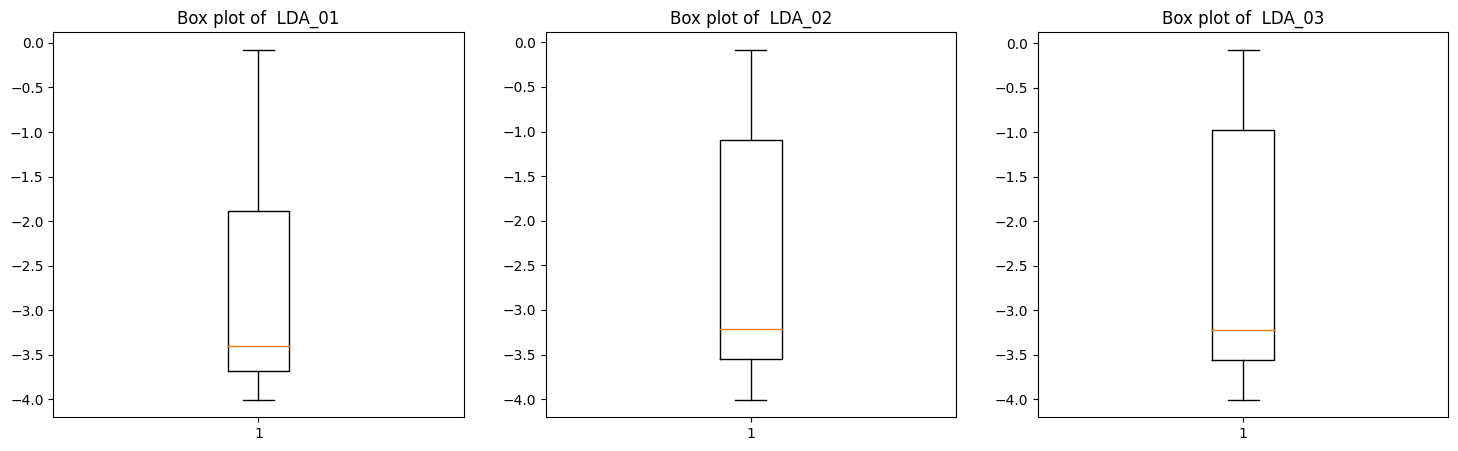

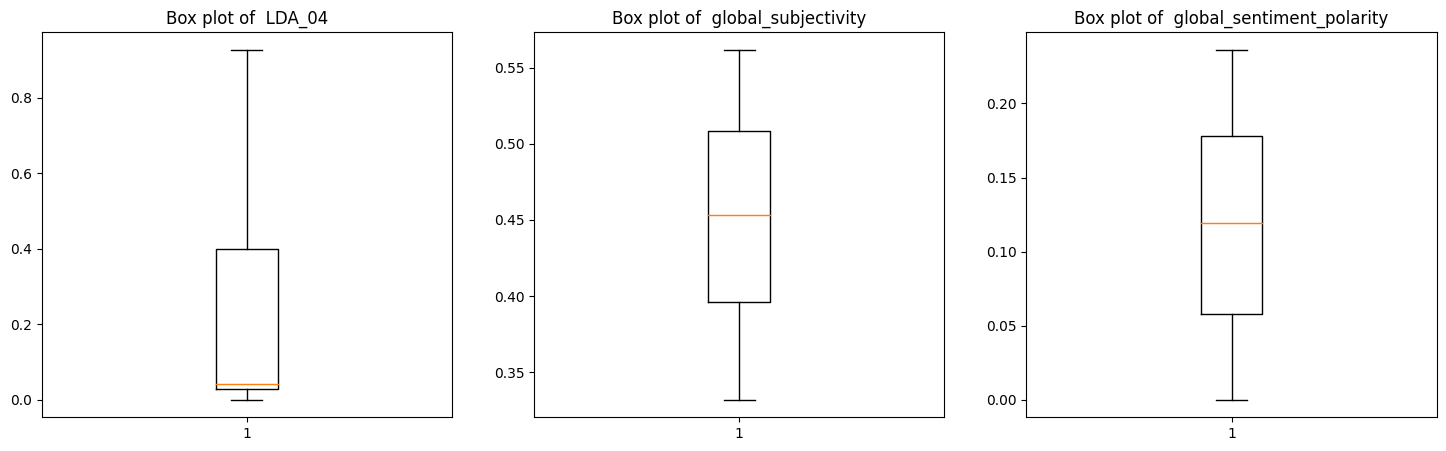

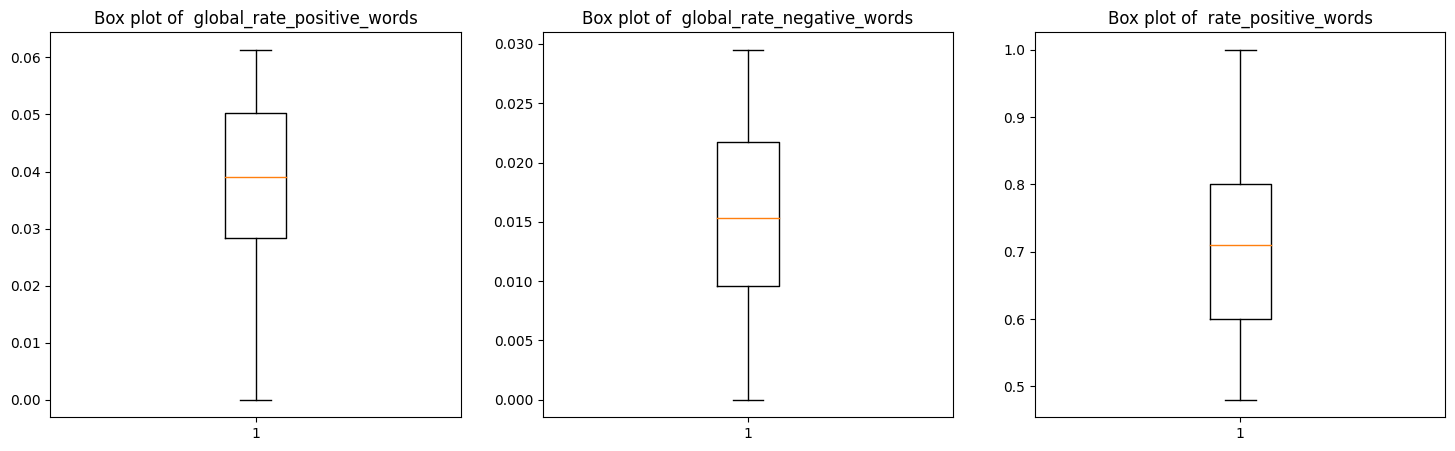

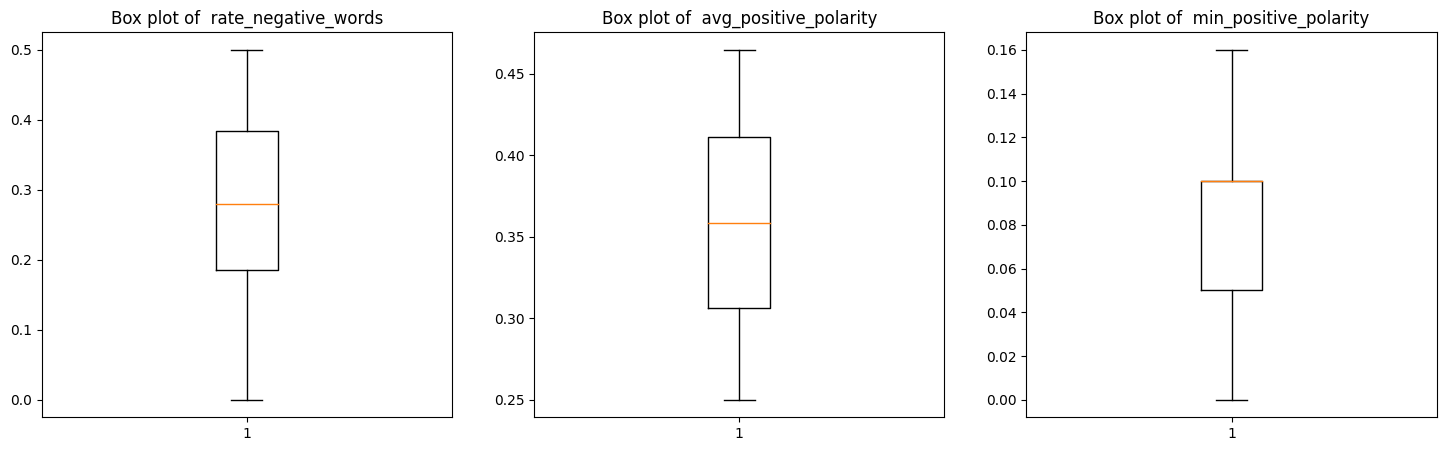

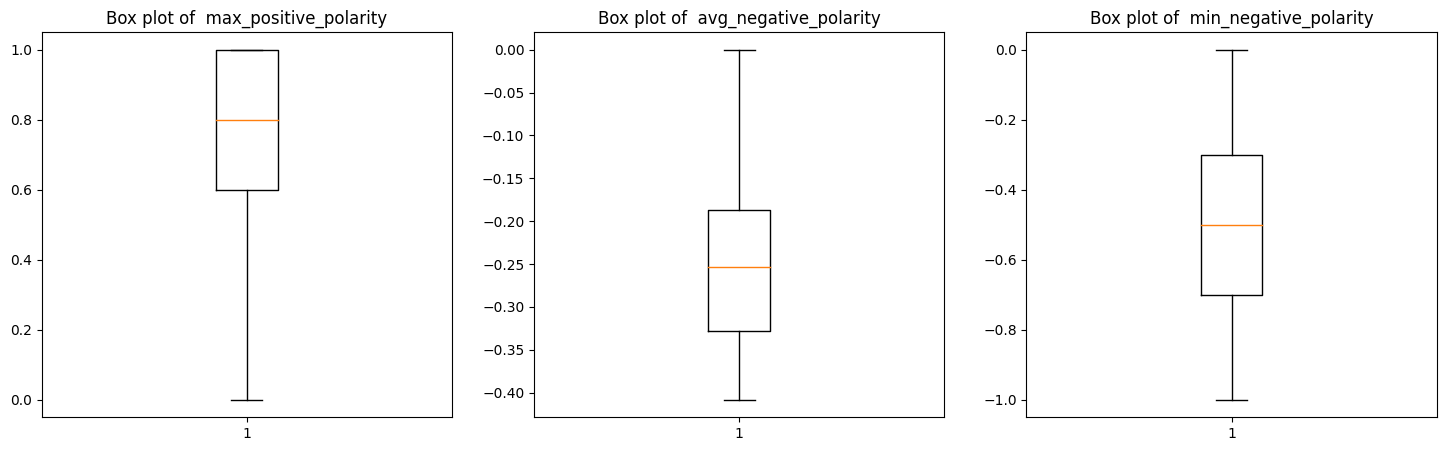

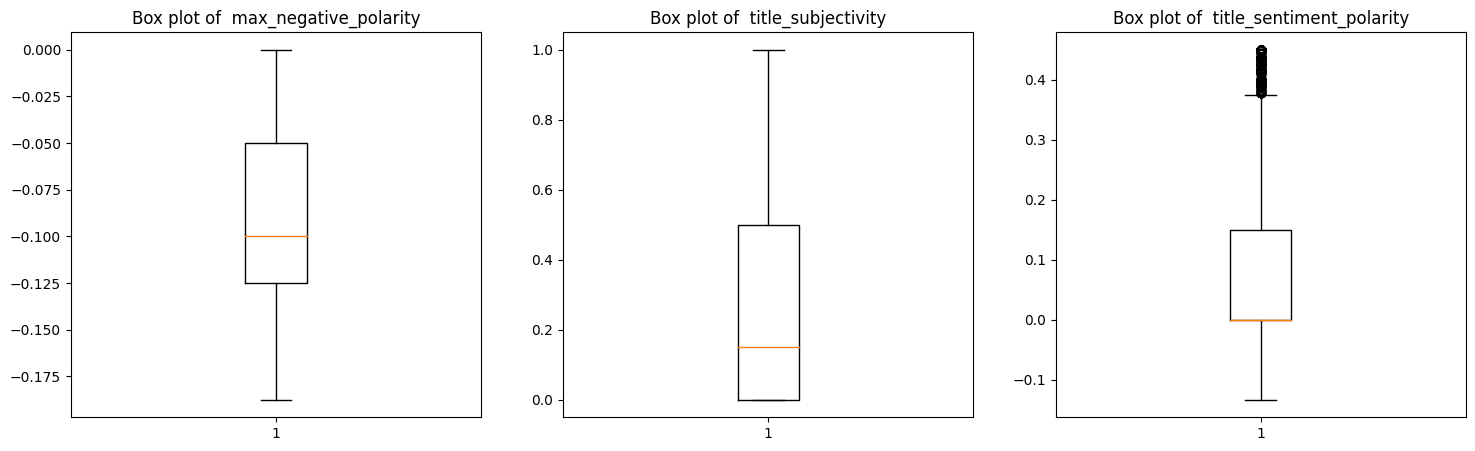

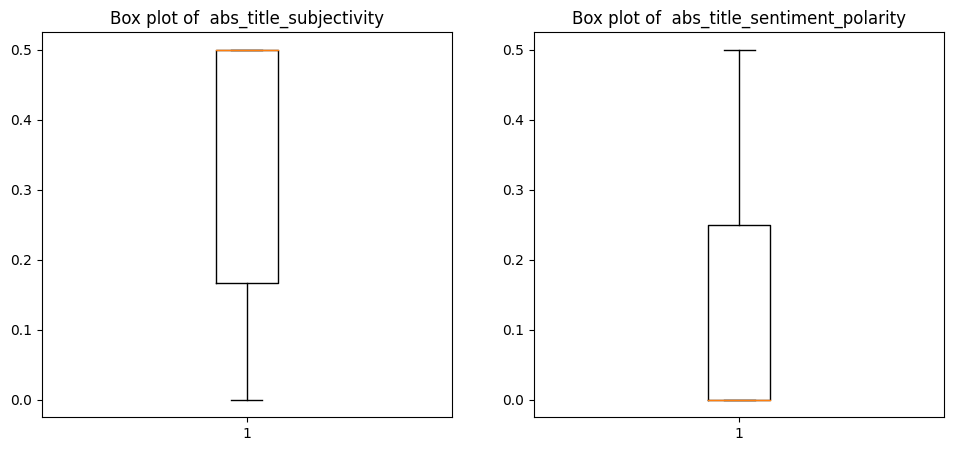

In [ ]:
col = news.drop(['url', ' shares'], axis=1).columns

i=0

while i < len(col):

    plt.figure(figsize=(18,5))
    plt.subplot(1,3,1)
    plt.boxplot(news[col[i]])
    title = 'Box plot of ' + str(col[i])
    plt.title(title)
    
    
    if i+1 < len(col):
        plt.subplot(1,3,2)
        plt.boxplot(news[col[i+1]])
        title = 'Box plot of ' +  str(col[i+1])
        plt.title(title)

    if i+2 < len(col):
        plt.subplot(1,3,3)
        plt.boxplot(news[col[i+2]])
        title = 'Box plot of ' +  str(col[i+2])
        plt.title(title)

    i+=3
    
plt.show()

In [ ]:
#Repeat previous steps as some box plots still contain outliers

Q1 = news.quantile(0.25)
Q3 = news.quantile(0.75)
IQR = Q3 - Q1


#Creating a dataframe with boolean values
#False that means these values are valid whereas 
#True indicates presence of an outlier

notinvalidarea = (news.drop(['url'], axis=1) < (Q1 - 1.5 * IQR)) | (news.drop(['url'], axis=1) > (Q3 + 1.5 * IQR))



columns_w_outliers = outliersinColumns(notinvalidarea)
print(columns_w_outliers)
print('\n')
print('Columns with outliers: {}'.format(len(columns_w_outliers)))

<ipython-input-159-3457704f96cb>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = news.quantile(0.25)
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
<ipython-input-159-3457704f96cb>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = news.quantile(0.75)


[' n_non_stop_words', ' num_imgs', ' kw_min_min', ' kw_min_max', ' kw_max_max', ' self_reference_min_shares', ' self_reference_max_shares', ' self_reference_avg_sharess', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' title_sentiment_polarity', ' shares']


Columns with outliers: 14


[' n_non_stop_words', ' num_imgs', ' kw_min_min', ' kw_min_max', ' kw_max_max', ' self_reference_min_shares', ' self_reference_max_shares', ' self_reference_avg_sharess', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' title_sentiment_polarity', ' shares']


/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs

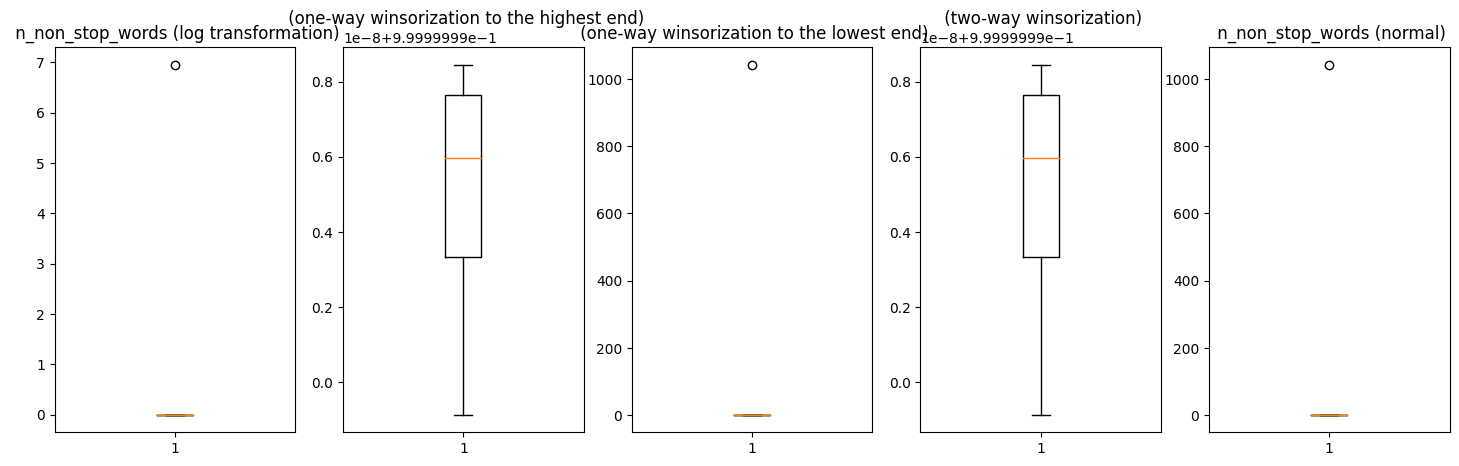

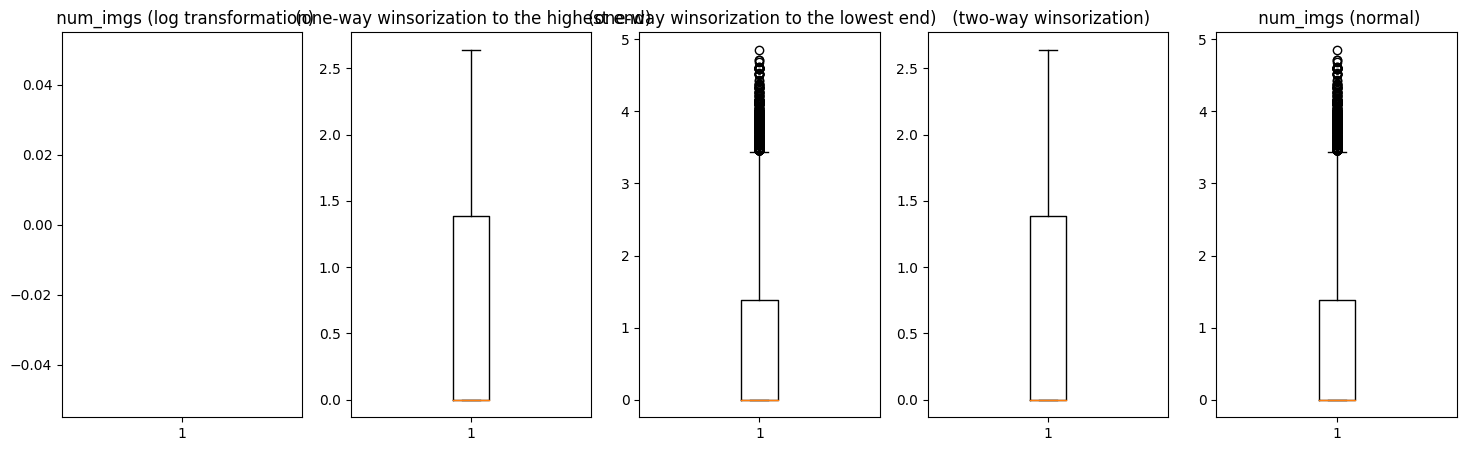

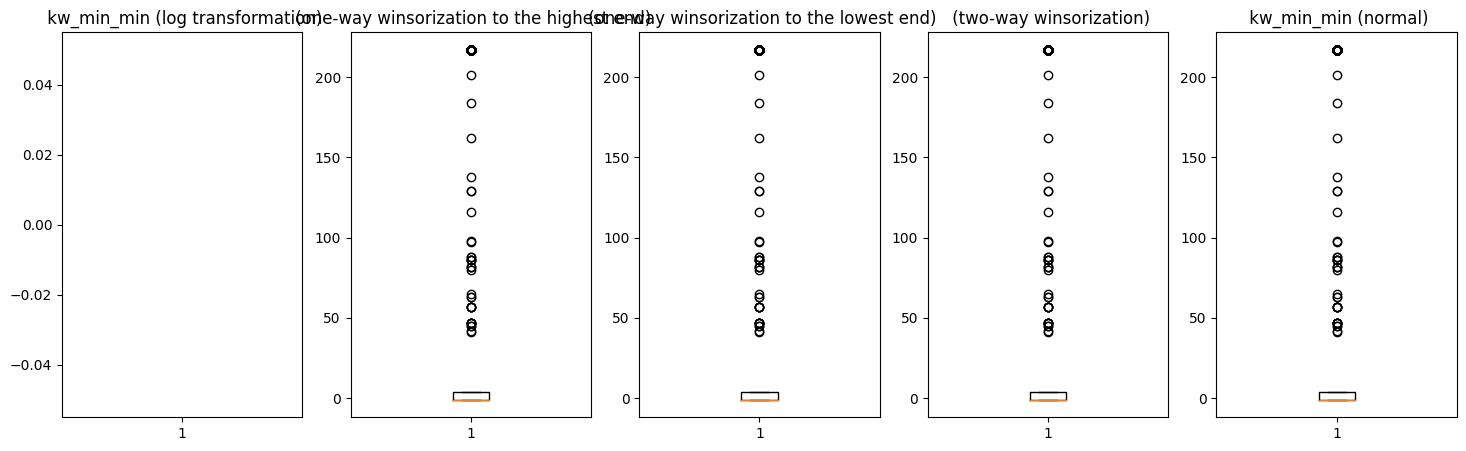

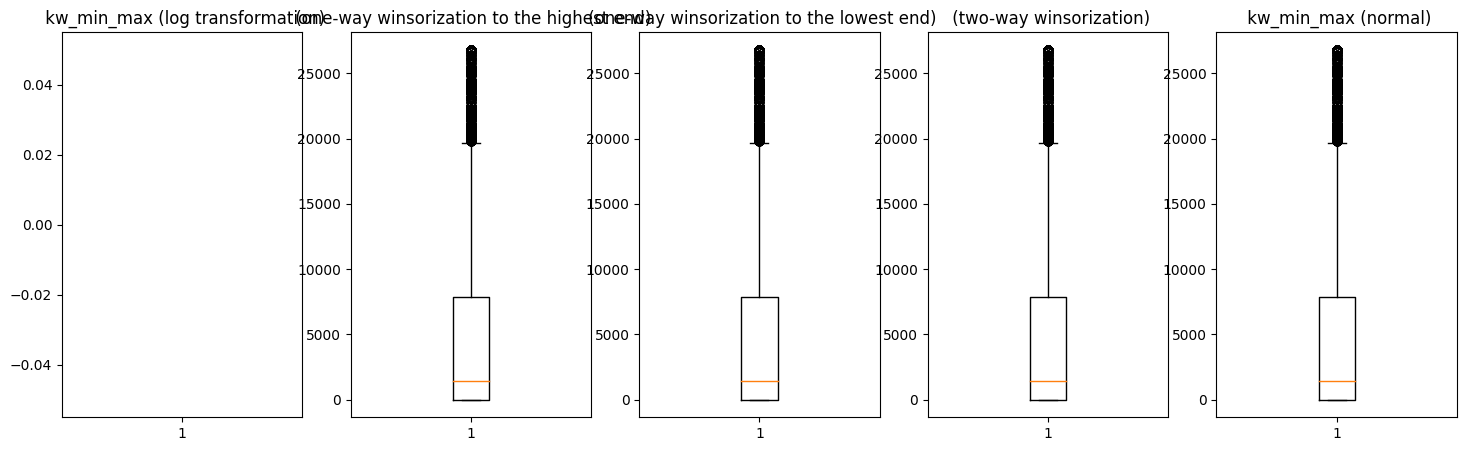

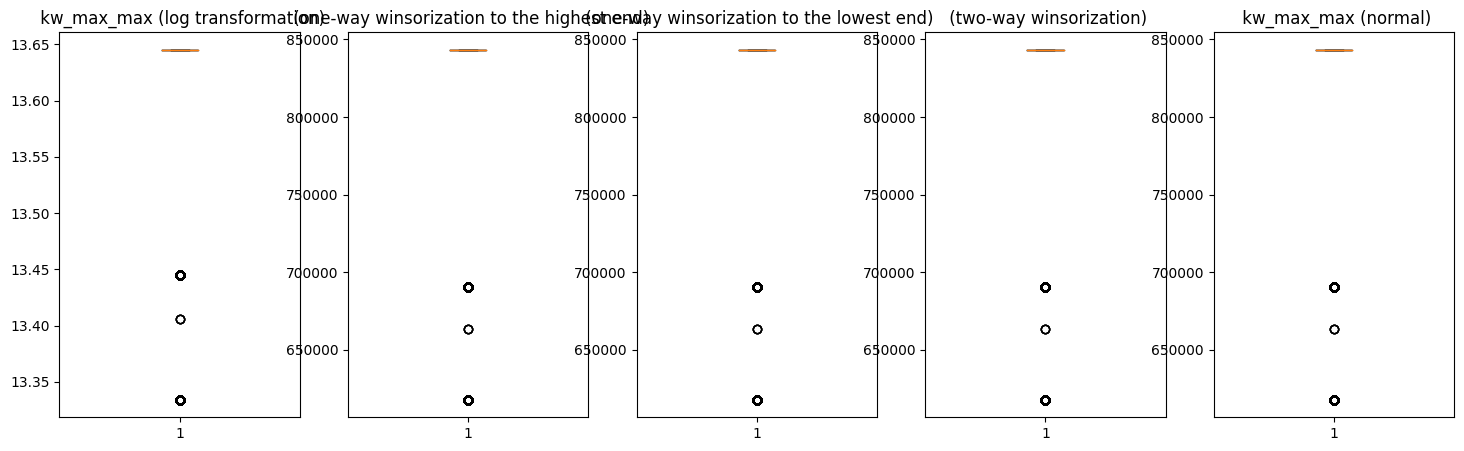

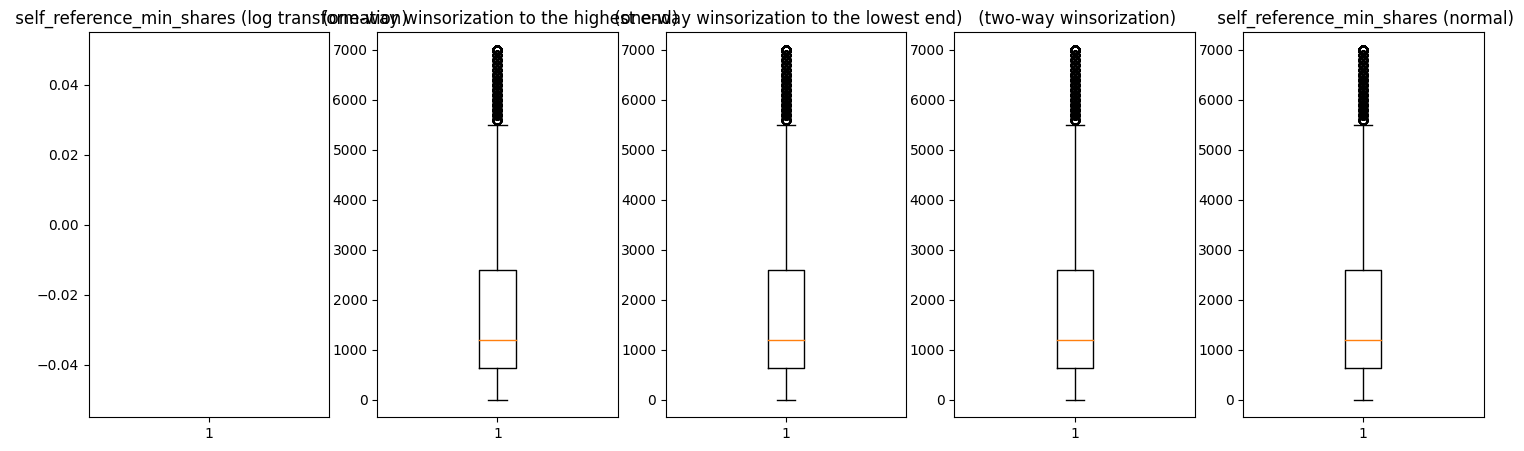

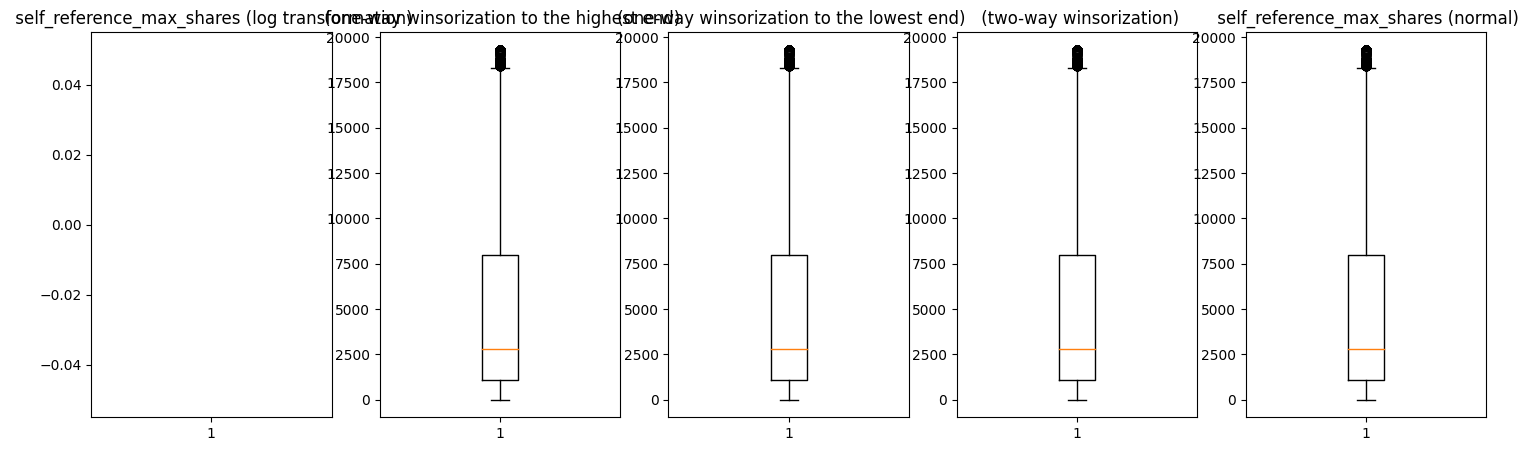

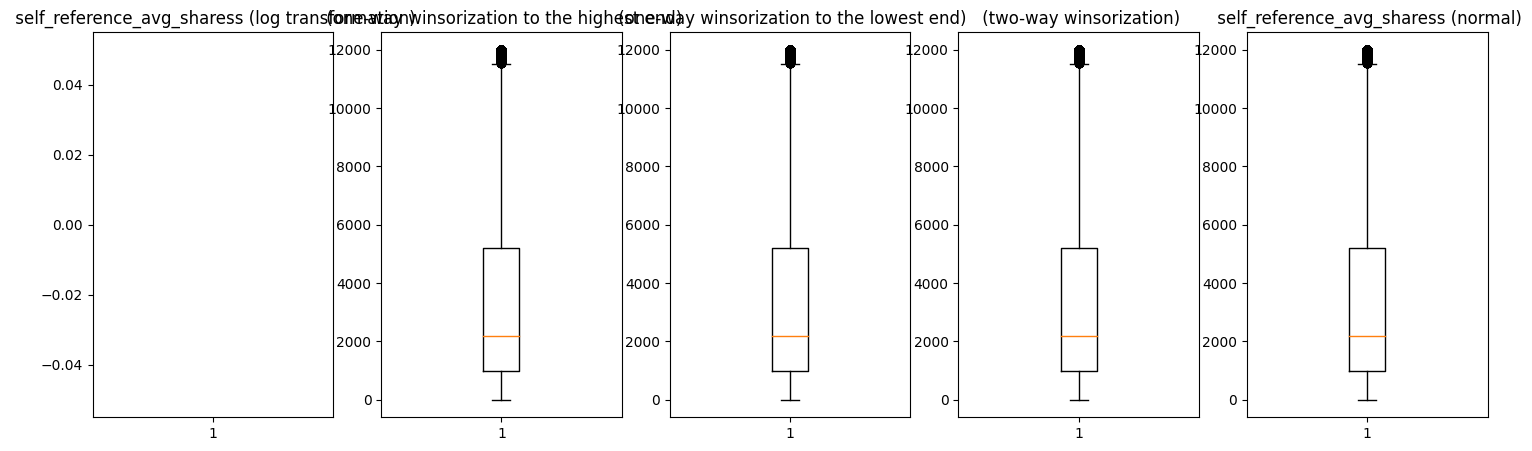

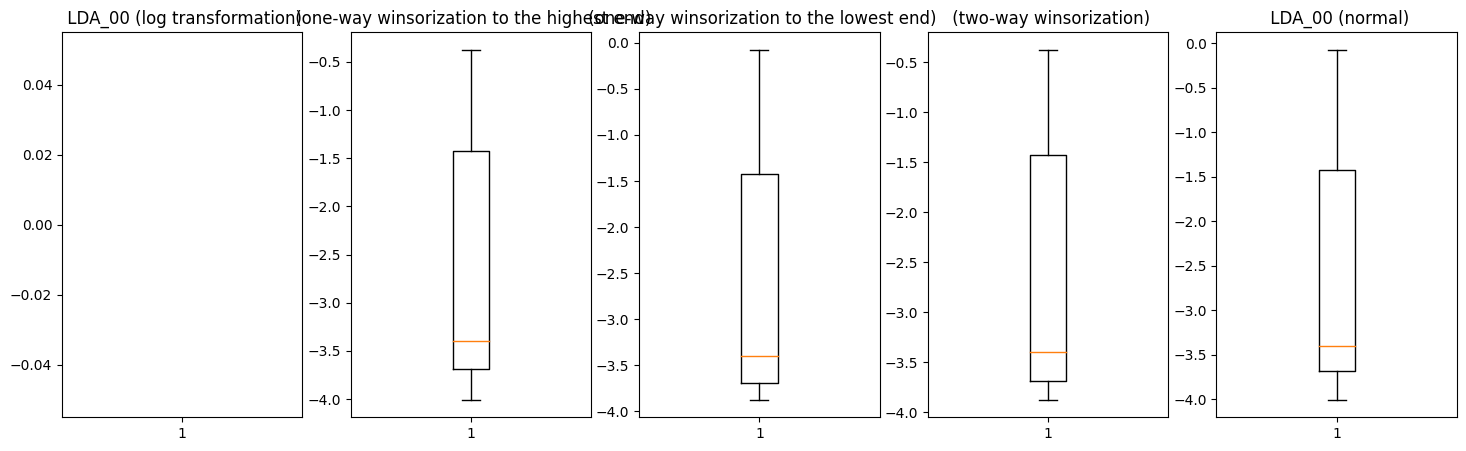

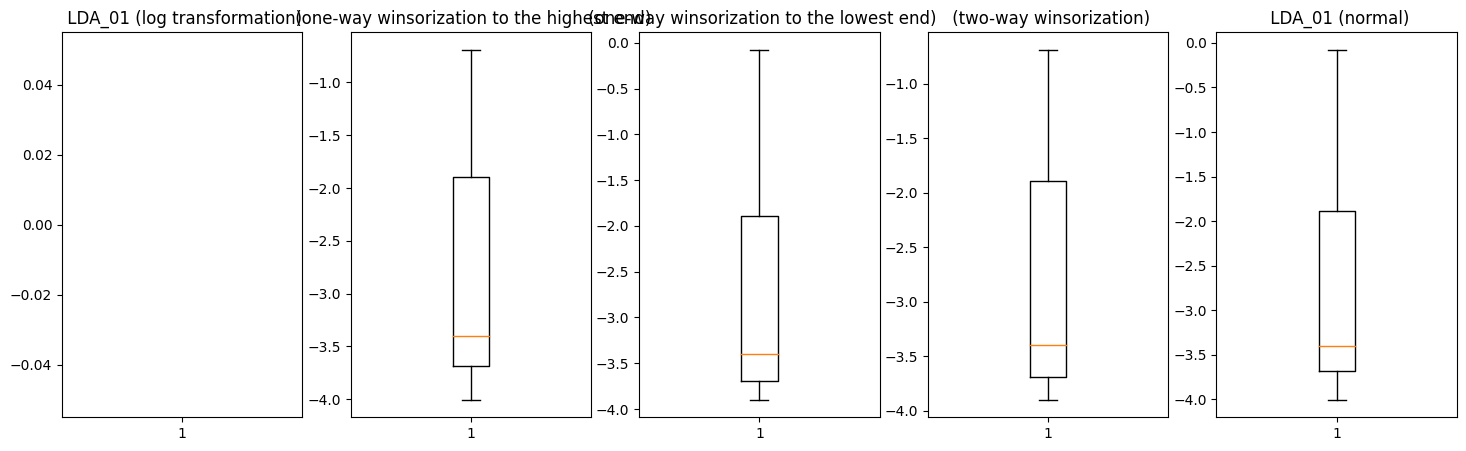

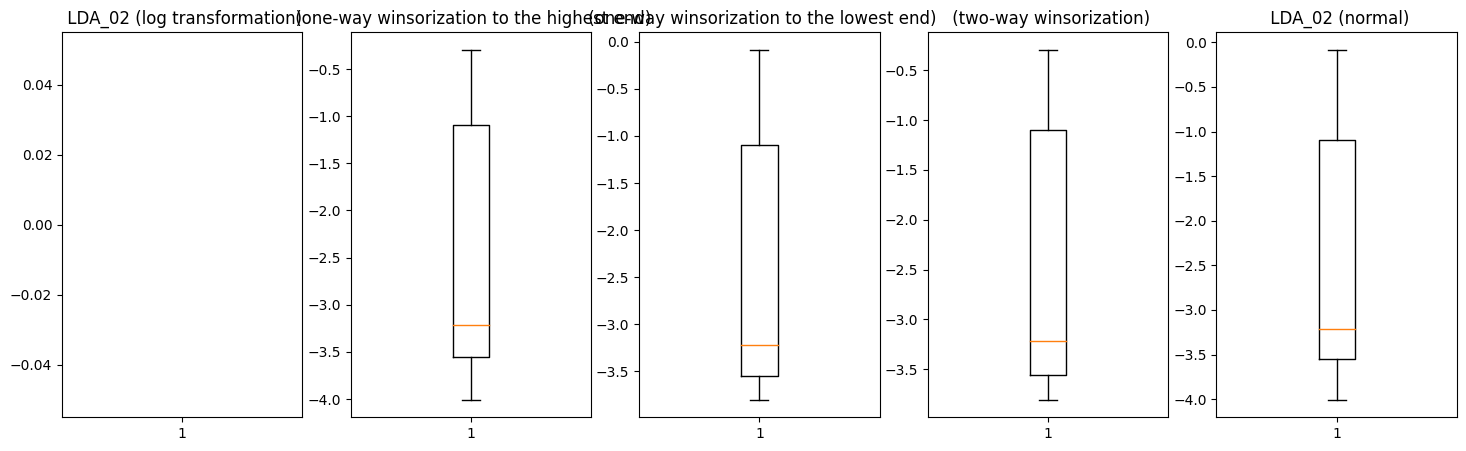

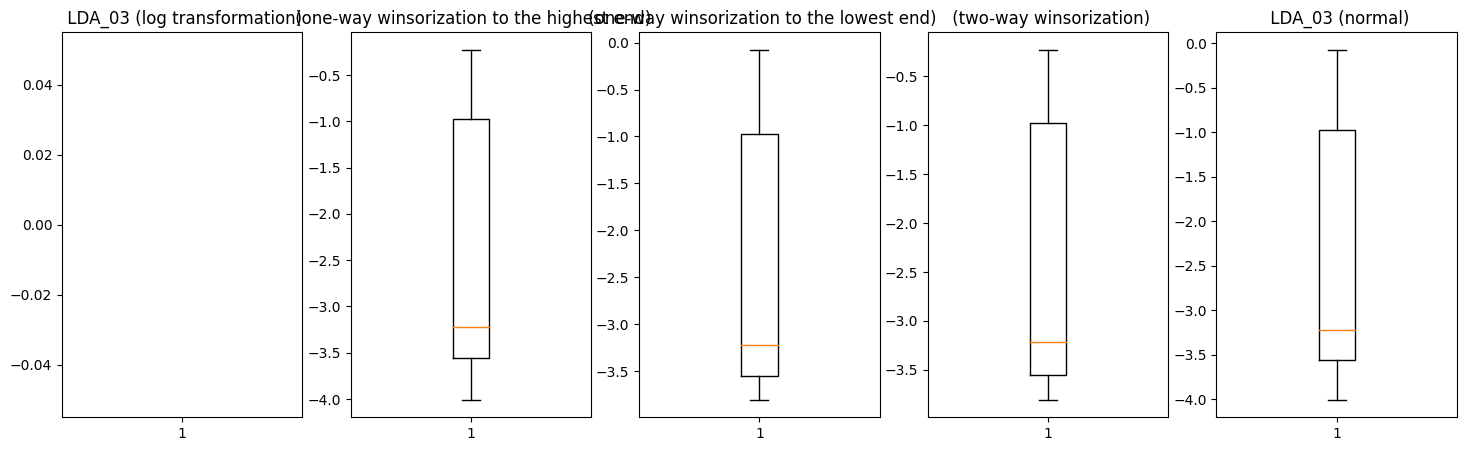

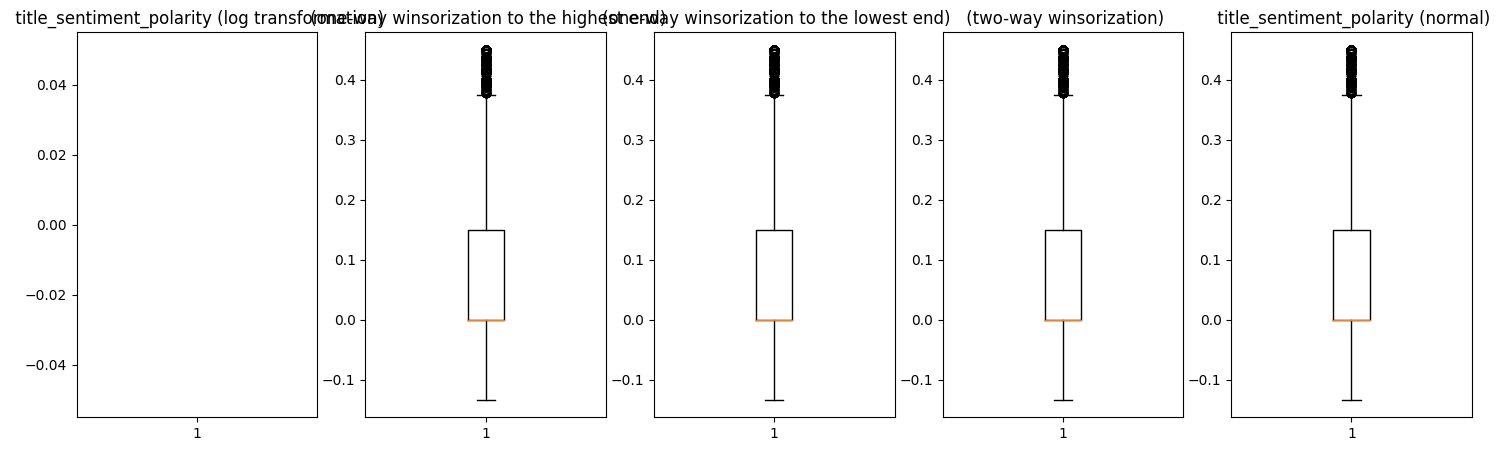

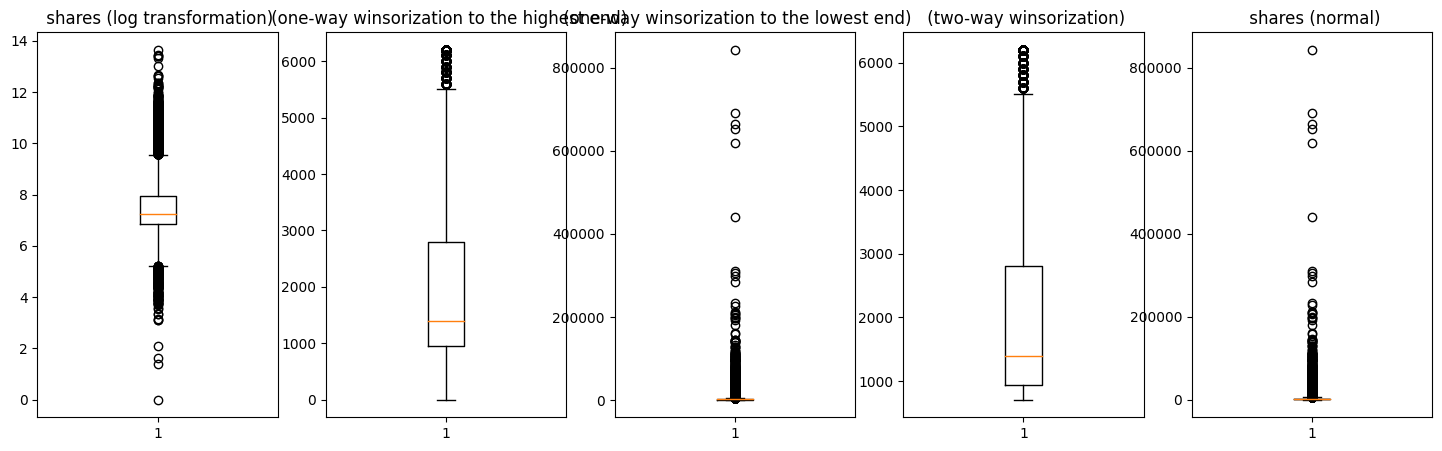

In [ ]:
print(columns_w_outliers)

i=0
while i < len(columns_w_outliers):

    plt.figure(figsize=(18,5), clear=True)
      
    plt.subplot(1,5,1)
    plt.boxplot(np.log(news[columns_w_outliers[i]]))
    title = str(columns_w_outliers[i]) + ' (log transformation)'
    plt.title(title)
    
    plt.subplot(1,5,2)
    plt.boxplot(winsorize(news[columns_w_outliers[i]],(0,0.10)))
    title =   ' (one-way winsorization to the highest end)'
    plt.title(title)

    plt.subplot(1,5,3)
    plt.boxplot(winsorize(news[columns_w_outliers[i]],(0.10,0)))
    title = ' (one-way winsorization to the lowest end)'
    plt.title(title)
    
    plt.subplot(1,5,4)
    plt.boxplot(winsorize(news[columns_w_outliers[i]],(0.10,0.10)))
    title =  ' (two-way winsorization)'
    plt.title(title)
    
    plt.subplot(1,5,5)
    plt.boxplot(news[columns_w_outliers[i]])
    title = str(columns_w_outliers[i]) + ' (normal)'
    plt.title(title)
    
    i+=1
    
plt.show()

In [ ]:
#    1 - log transformation,
#    2 - one-way winsorization to the highest end,
#    3 - one-way winsorization to the lowest end,
#    4 - two-way winsorization

t = {' n_non_stop_words':4, ' num_imgs':4, ' num_videos':2, ' kw_min_min':2, ' kw_min_max':2, ' kw_max_max':2,
 ' self_reference_min_shares':4, ' self_reference_max_shares':4, 
 ' self_reference_avg_sharess':4, ' LDA_00':4, ' LDA_01':4, ' LDA_02':4, ' LDA_03':4,' title_sentiment_polarity':4, ' shares':4}

In [ ]:
from scipy.stats.mstats import winsorize
for k in t:
    if t[k] == 1:
        news[k] = np.log(news[k])
        
    elif t[k] == 2:
        news[k] = winsorize(news[k],(0,0.10))

    elif t[k] == 3:
        news[k] = winsorize(news[k],(0.10,0))
        
    elif t[k] == 4:
        news[k] = winsorize(news[k],(0.10,0.10))

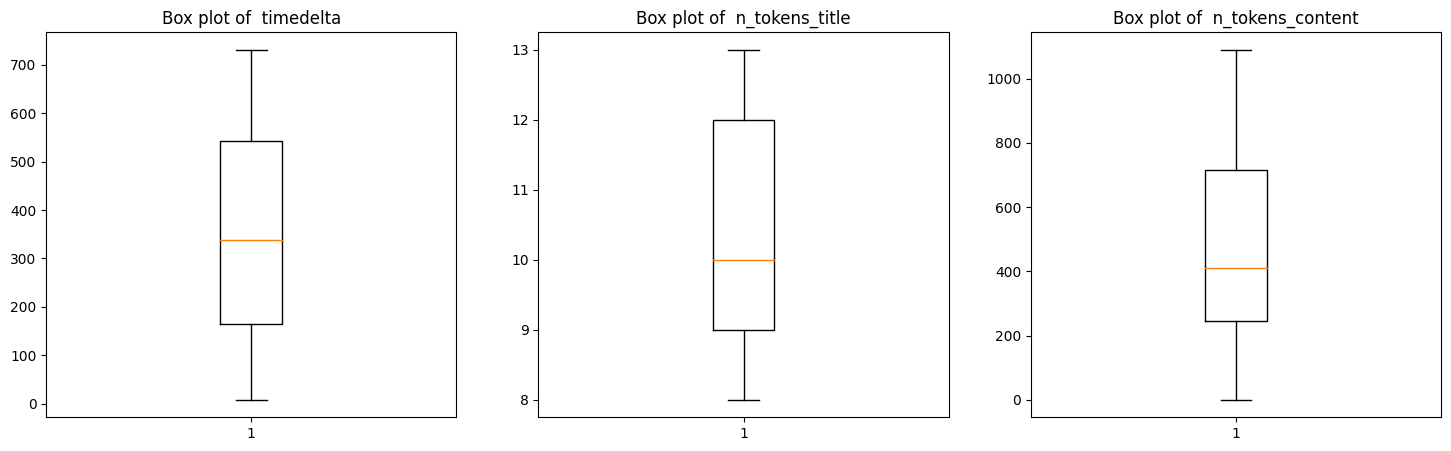

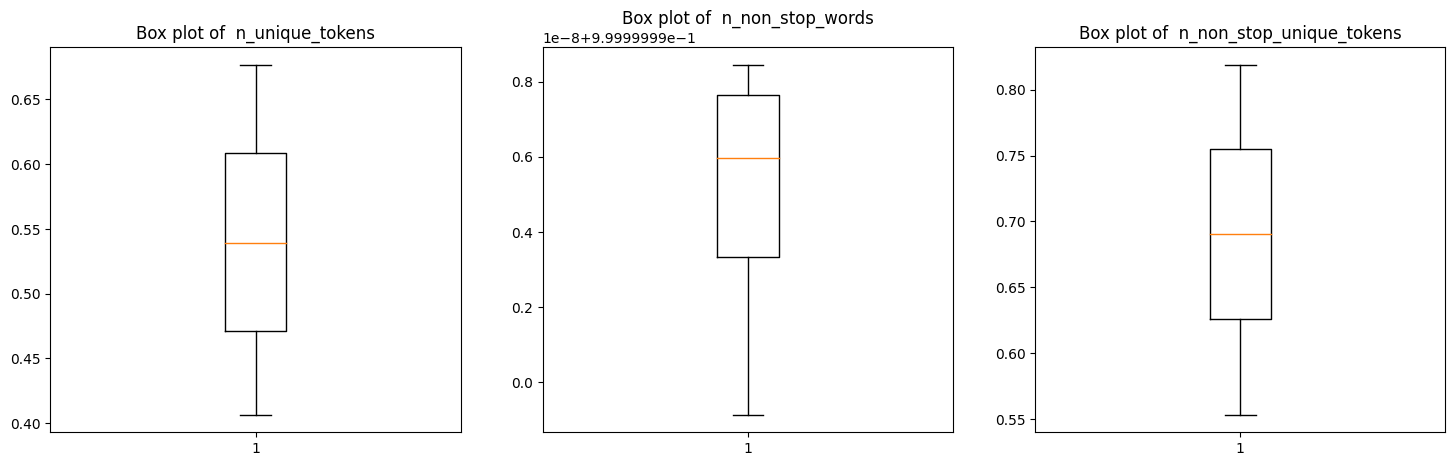

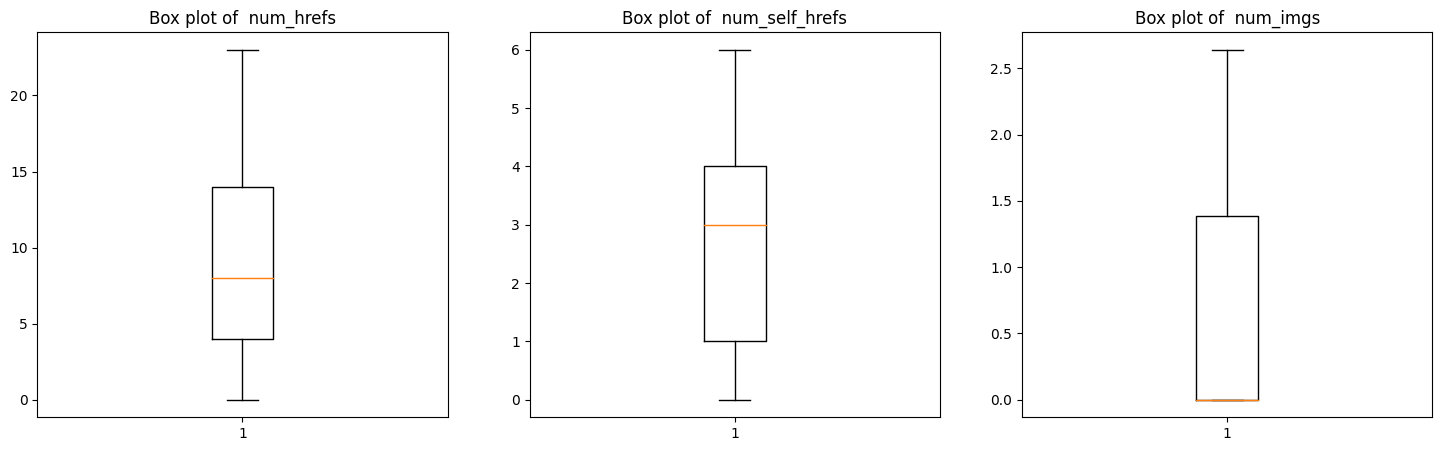

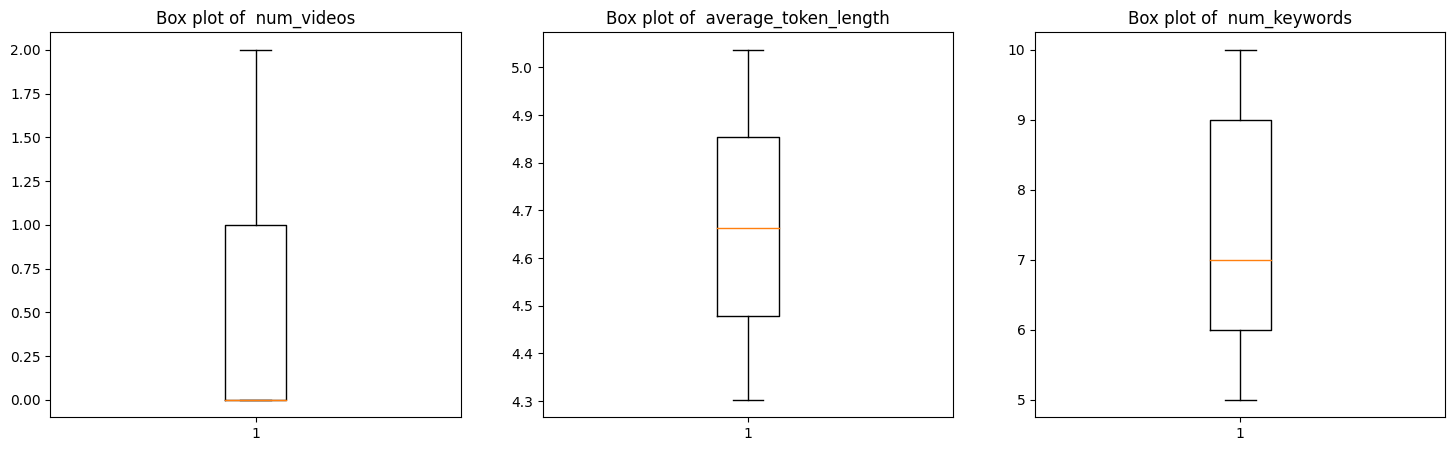

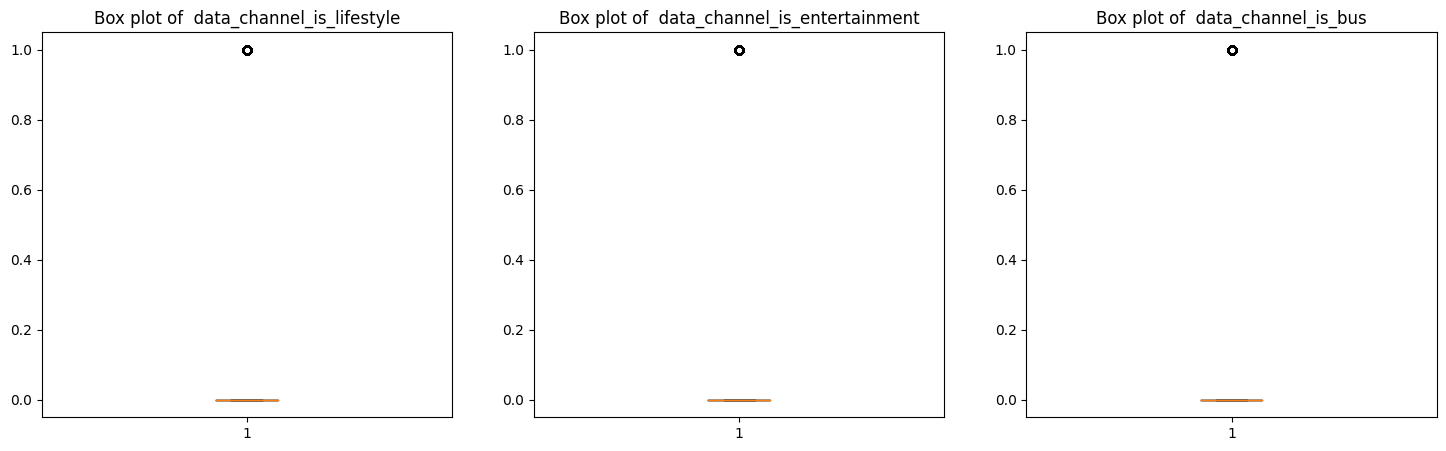

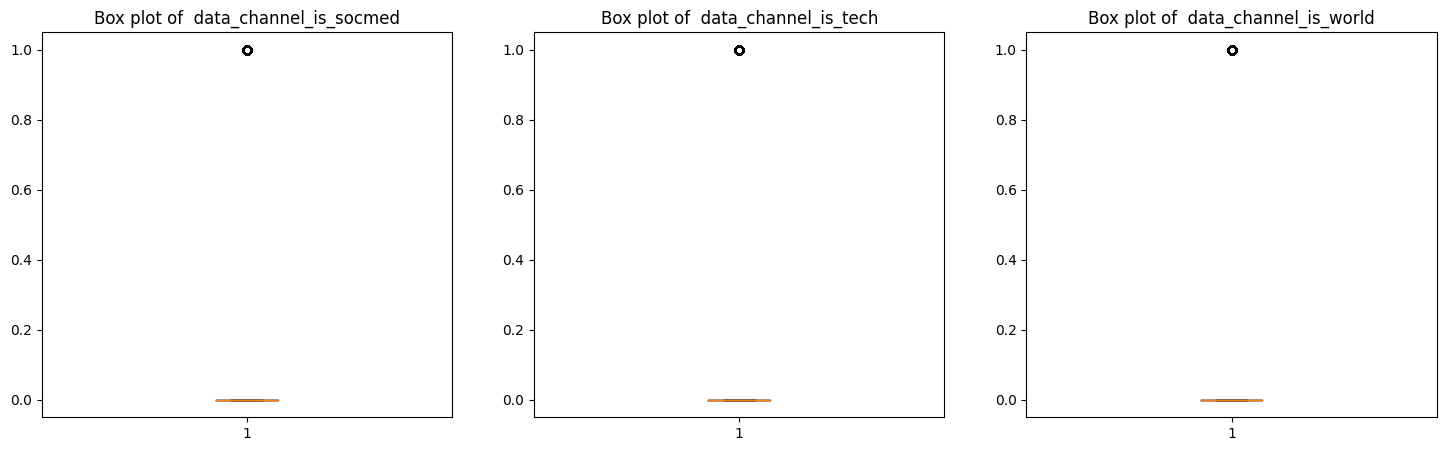

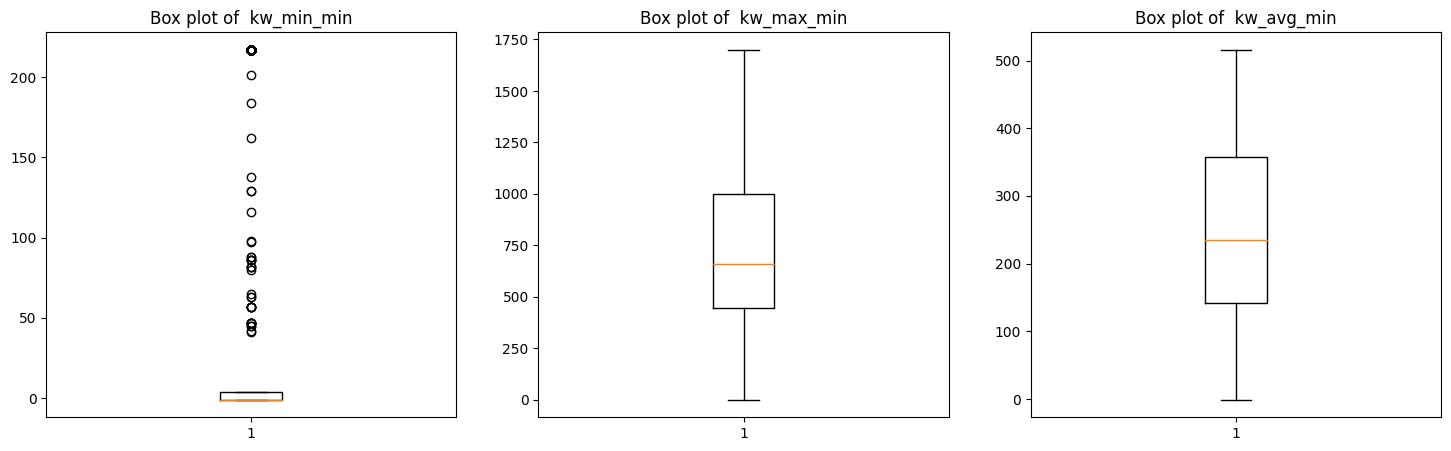

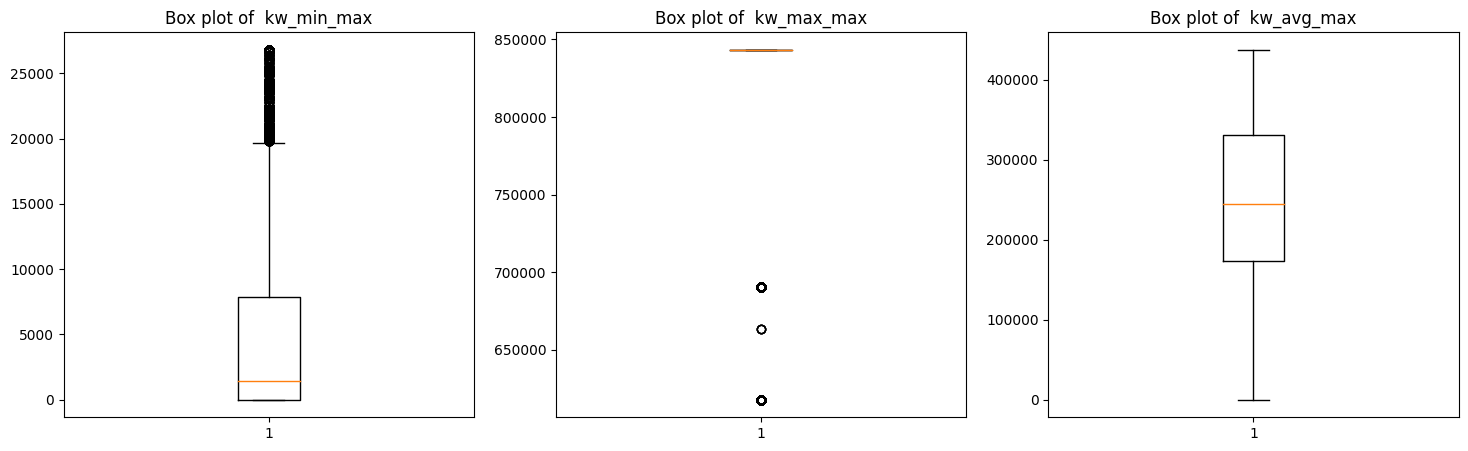

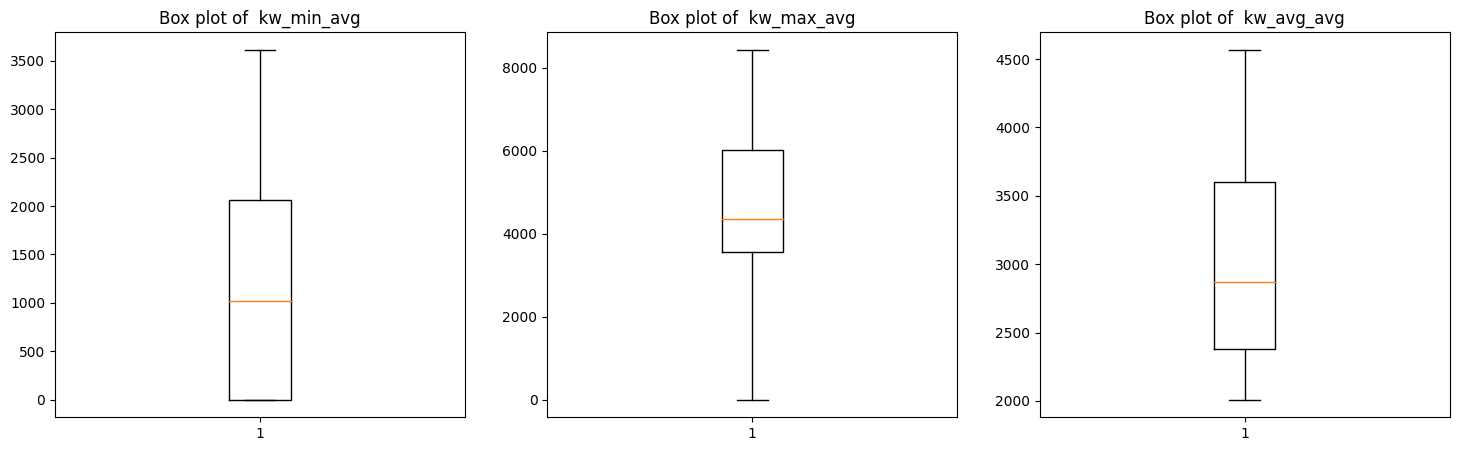

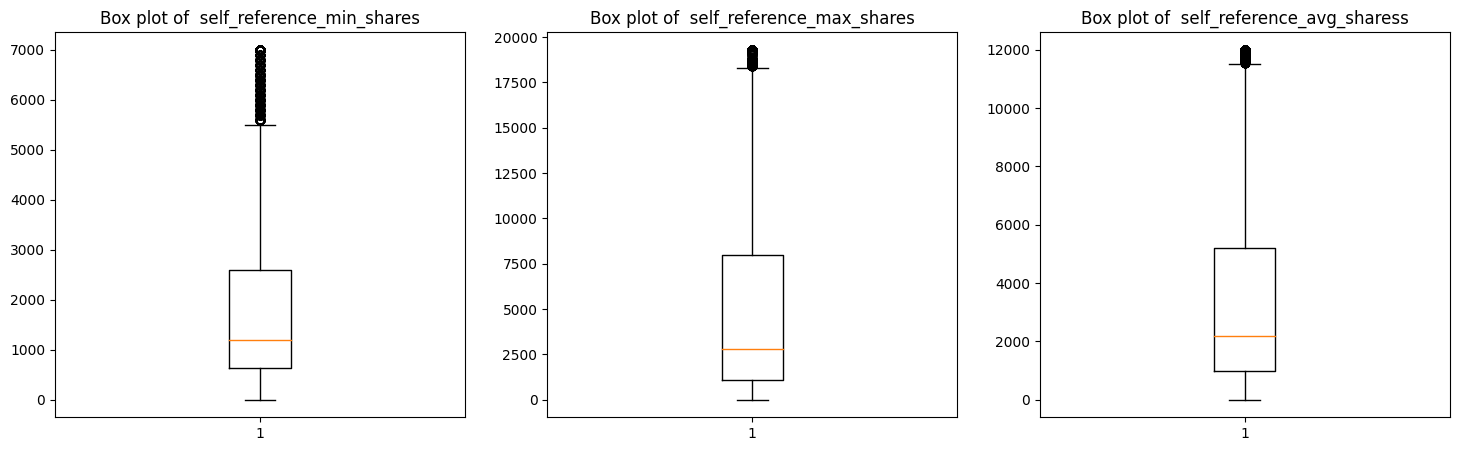

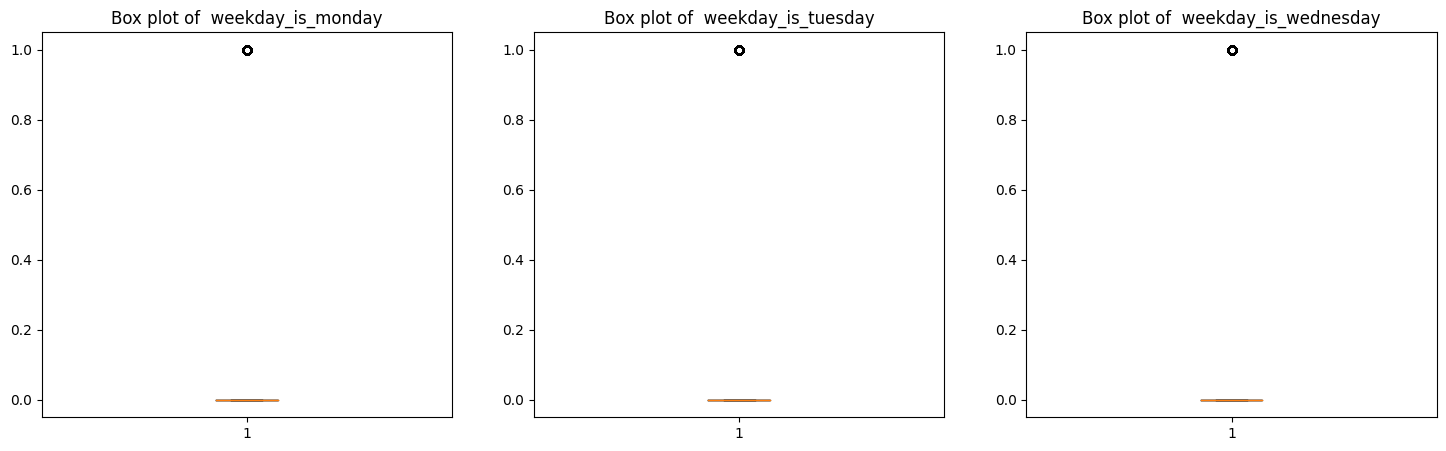

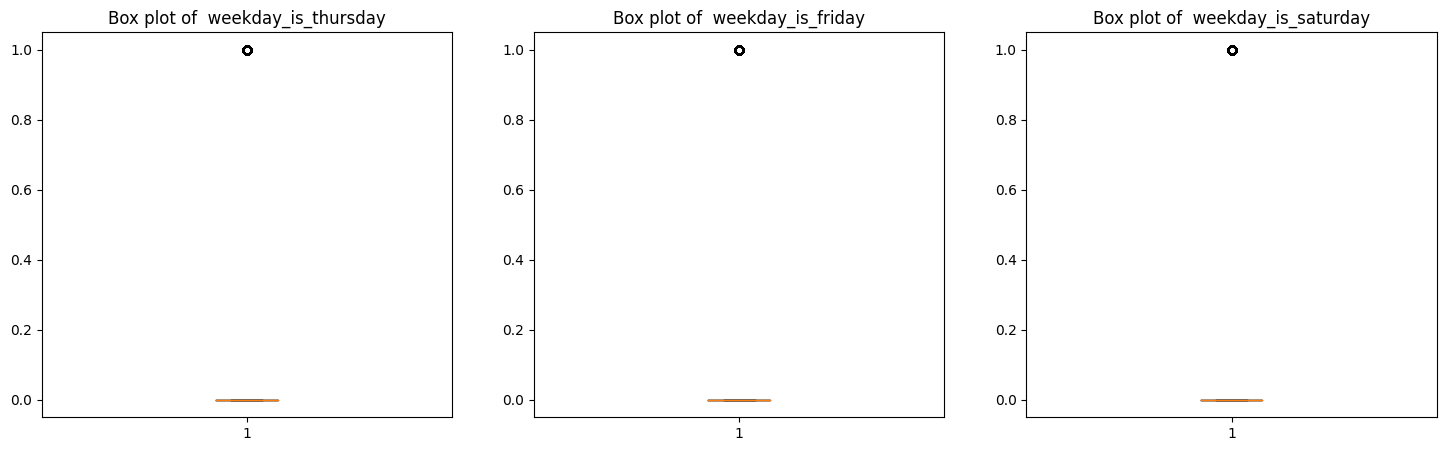

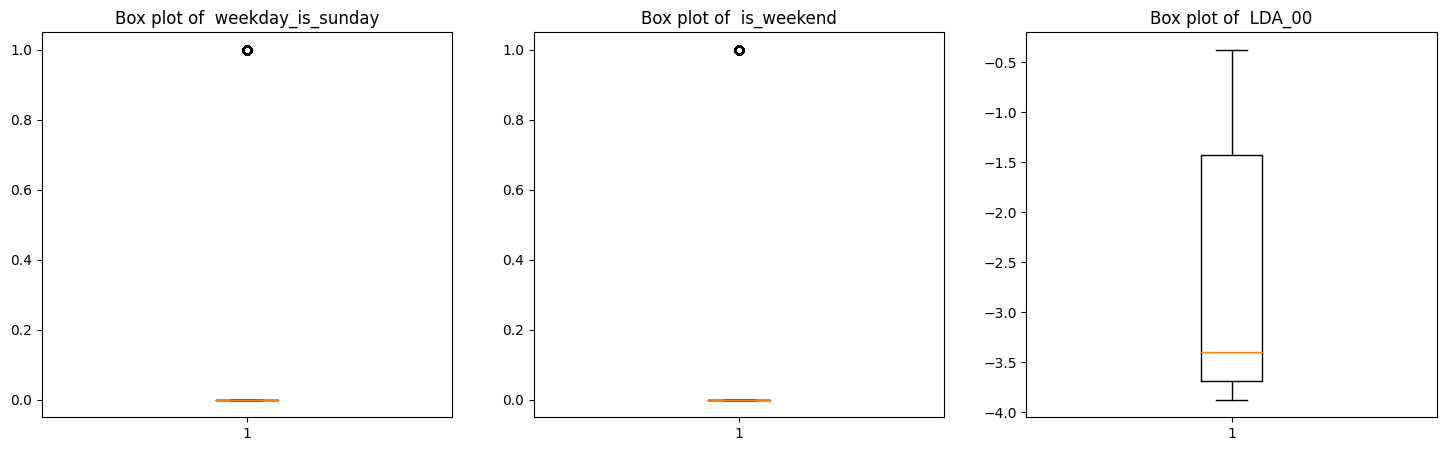

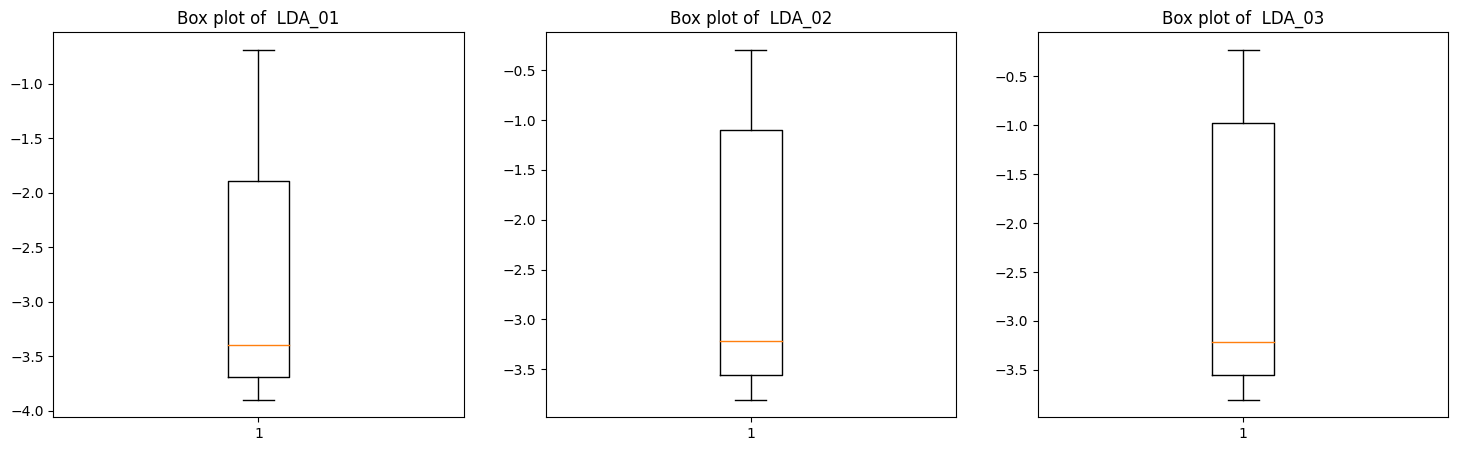

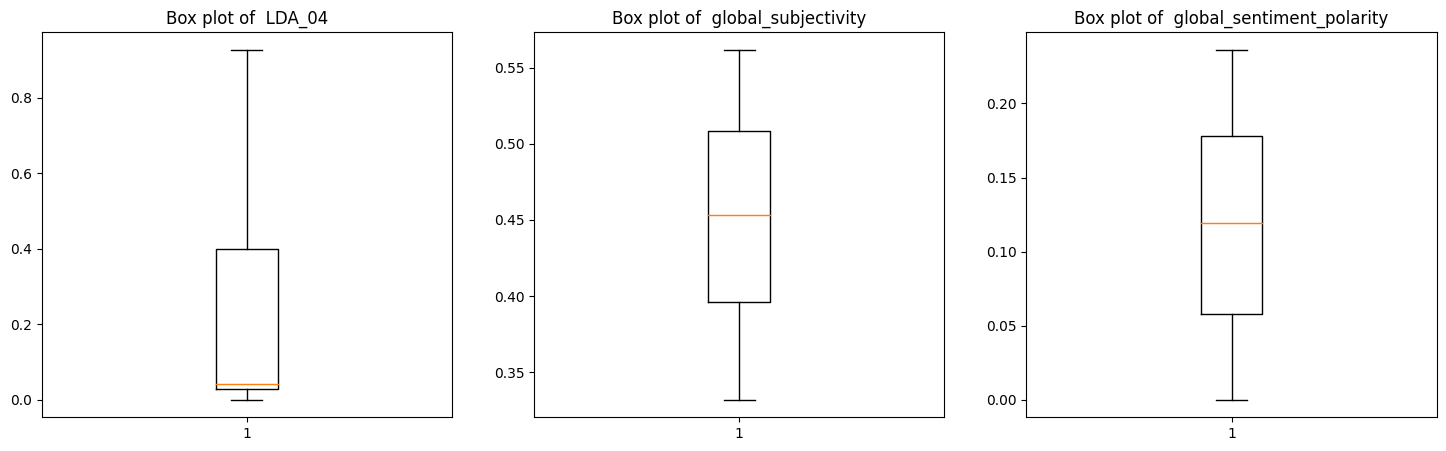

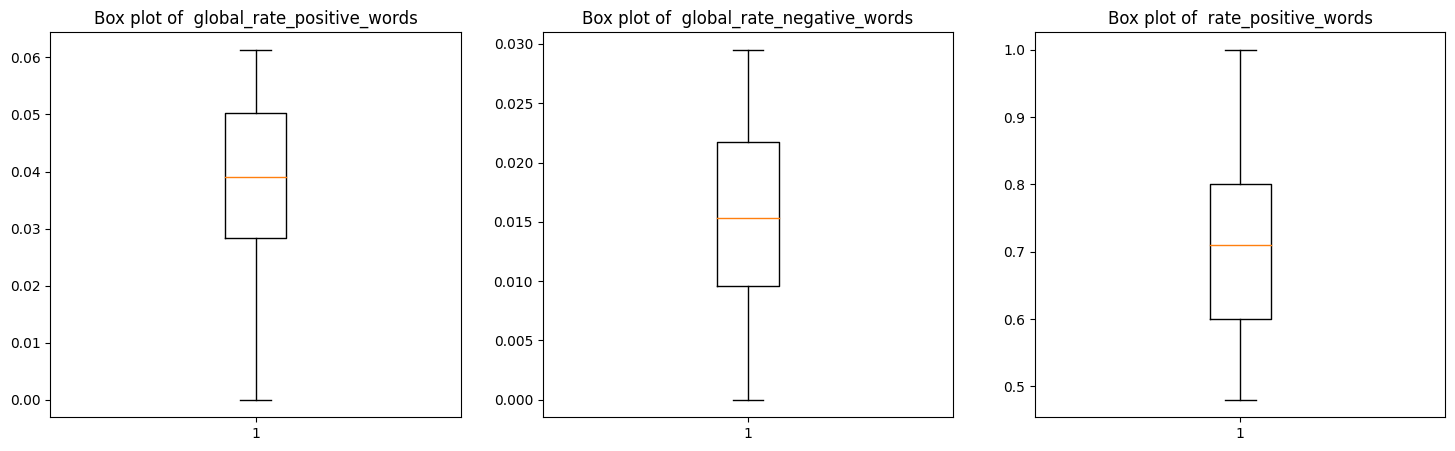

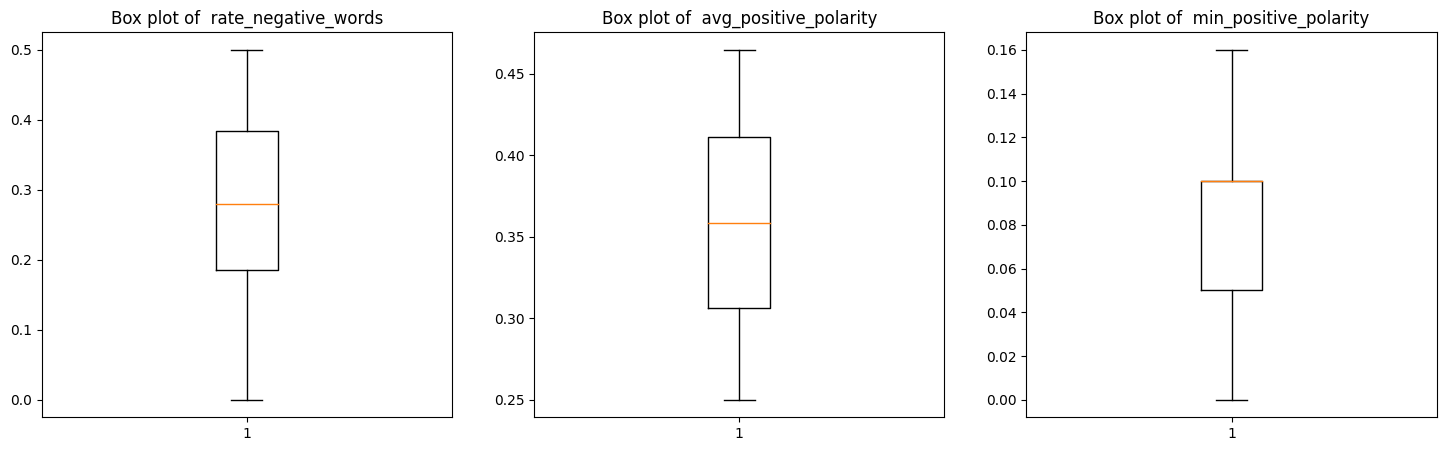

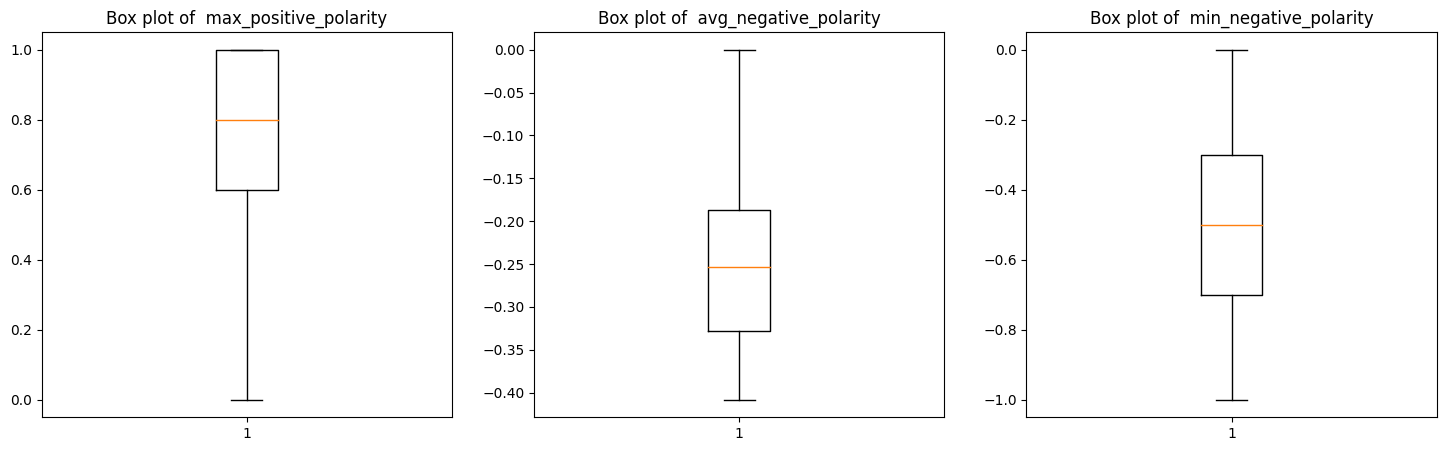

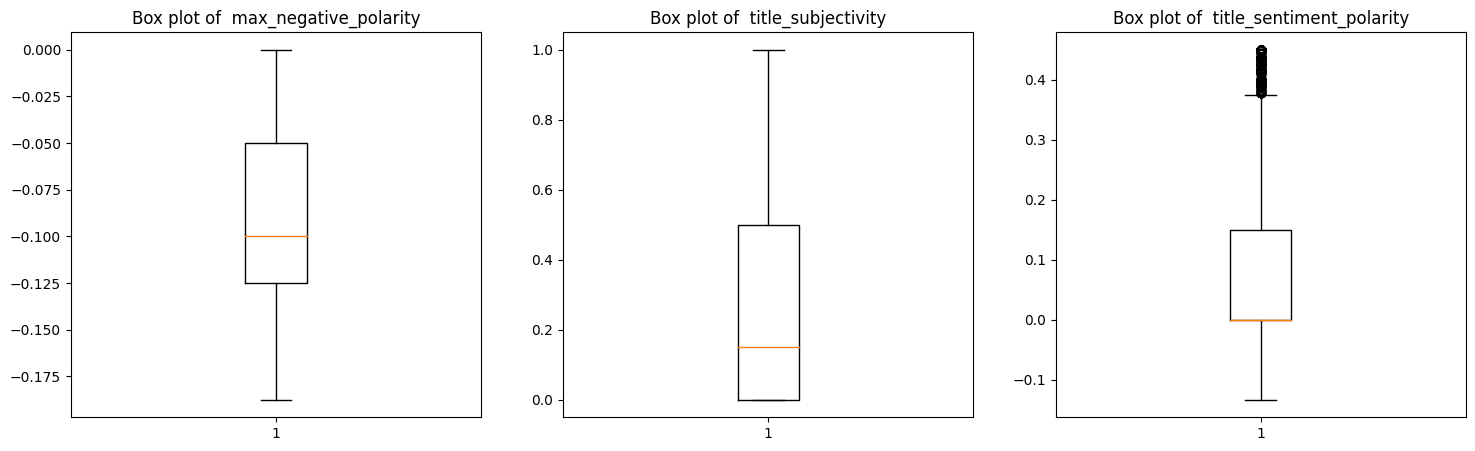

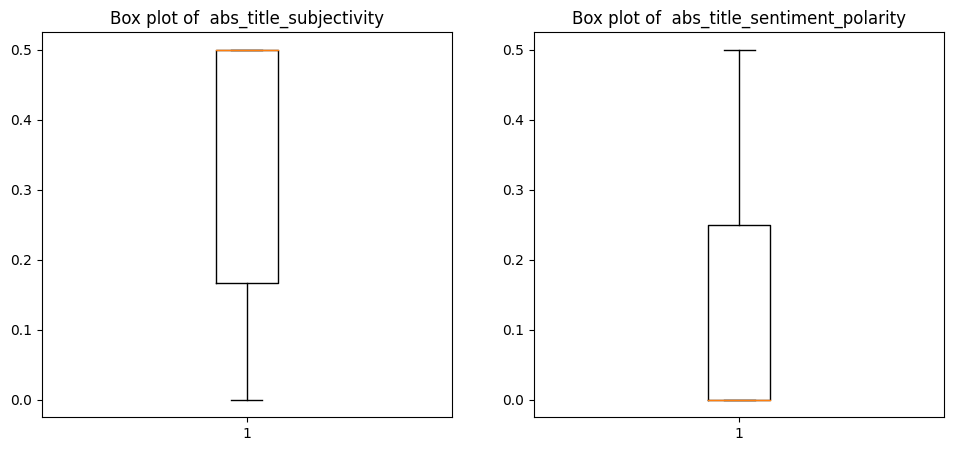

In [ ]:
col = news.drop(['url', ' shares'], axis=1).columns

i=0

while i < len(col):

    plt.figure(figsize=(18,5))
    plt.subplot(1,3,1)
    plt.boxplot(news[col[i]])
    title = 'Box plot of ' + str(col[i])
    plt.title(title)
    
    
    if i+1 < len(col):
        plt.subplot(1,3,2)
        plt.boxplot(news[col[i+1]])
        title = 'Box plot of ' +  str(col[i+1])
        plt.title(title)

    if i+2 < len(col):
        plt.subplot(1,3,3)
        plt.boxplot(news[col[i+2]])
        title = 'Box plot of ' +  str(col[i+2])
        plt.title(title)

    i+=3
    
plt.show()

# More Data Exploration

<ipython-input-164-46949a6e4fde>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = news.corr()


Text(0.5, 1.0, 'Correlation Matrix')

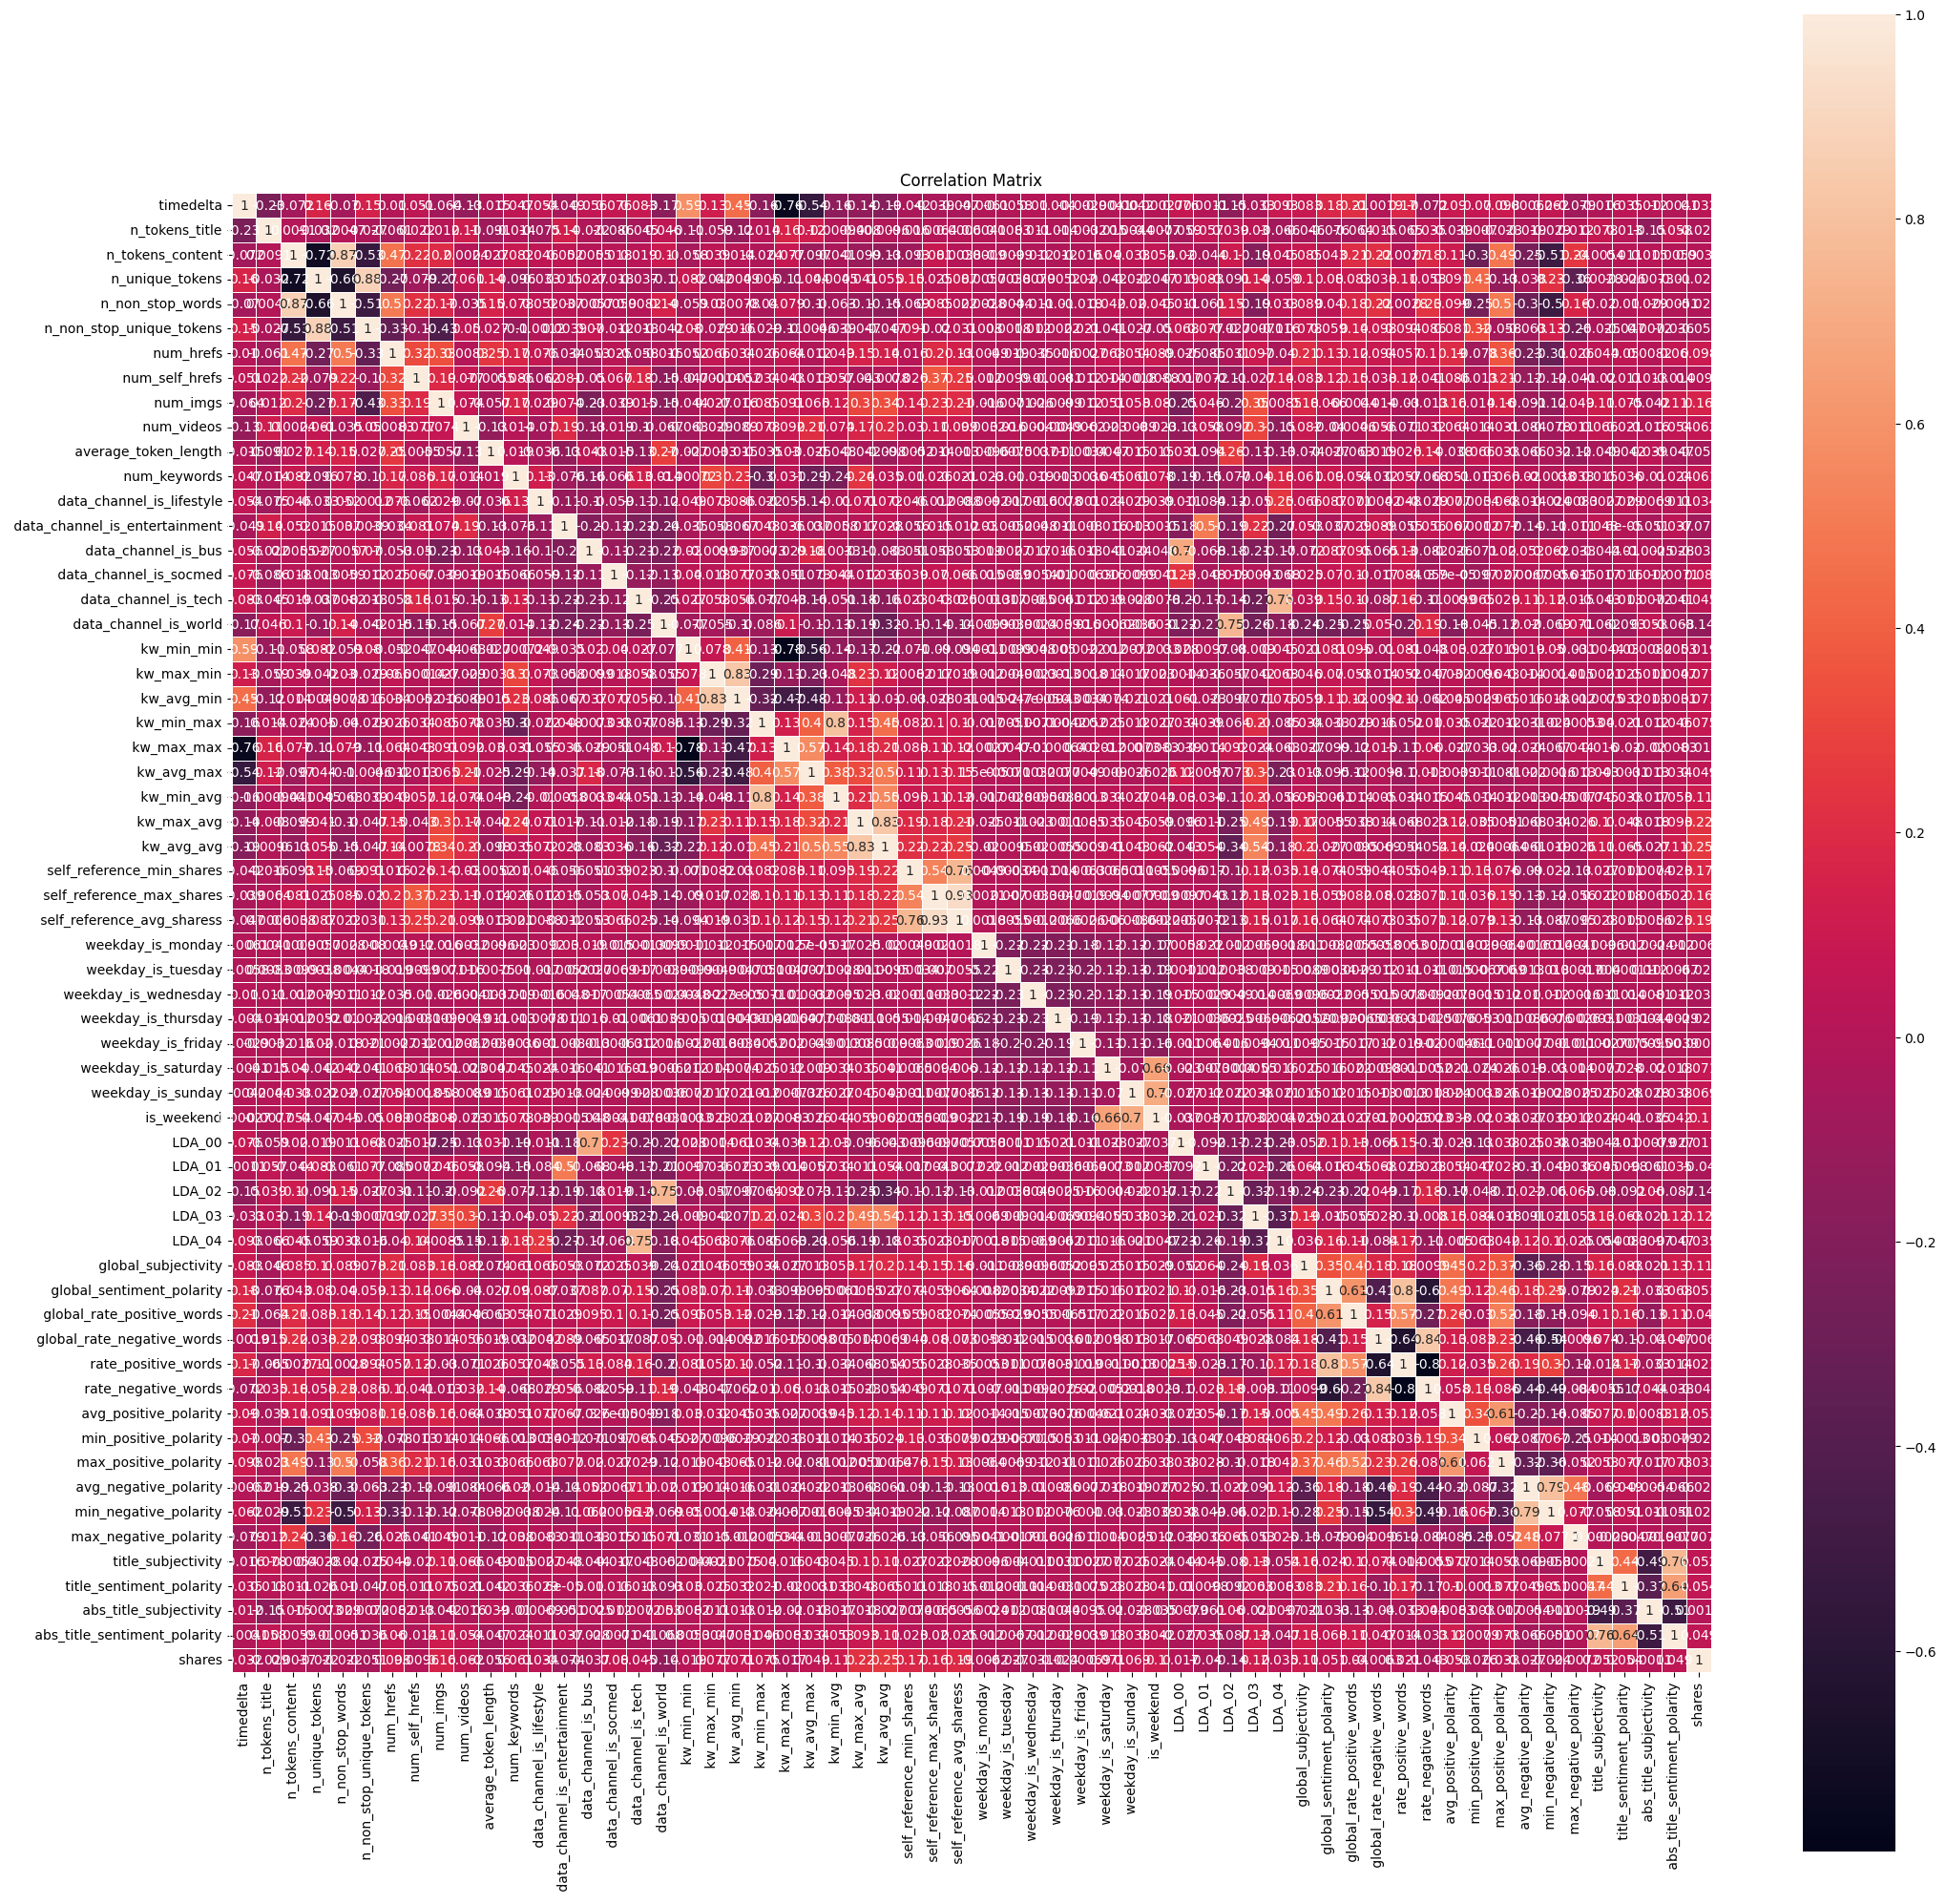

In [ ]:
correlation = news.corr()

plt.figure(figsize=(25,25))
sns.heatmap(correlation, square=True, annot=True, linewidths=.5)
plt.title("Correlation Matrix")

In [ ]:
correlation[' shares'].sort_values(ascending=True)

 data_channel_is_world           -0.141286
 LDA_02                          -0.138834
 data_channel_is_entertainment   -0.074066
 average_token_length            -0.055795
 n_non_stop_unique_tokens        -0.051253
 rate_negative_words             -0.042715
 LDA_01                          -0.040157
 data_channel_is_bus             -0.036577
 weekday_is_wednesday            -0.031407
 n_tokens_title                  -0.029234
 avg_negative_polarity           -0.027268
 weekday_is_tuesday              -0.026624
 min_positive_polarity           -0.025869
 weekday_is_thursday             -0.024349
 min_negative_polarity           -0.023656
 n_unique_tokens                 -0.021806
 n_non_stop_words                -0.021639
 kw_max_max                      -0.016874
 max_negative_polarity           -0.007227
 global_rate_negative_words      -0.006288
 weekday_is_monday               -0.006211
 weekday_is_friday               -0.000690
 abs_title_subjectivity           0.001147
 n_tokens_c

In [ ]:
a,b = news[' shares'].mean(),news[' shares'].median()

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [ ]:
print(f'Mean article shares = {a}')

Mean article shares = 2201.8383614166078


In [ ]:
Wday = news.columns.values[31:38]
Wday

array([' weekday_is_monday', ' weekday_is_tuesday',
       ' weekday_is_wednesday', ' weekday_is_thursday',
       ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday'],
      dtype=object)

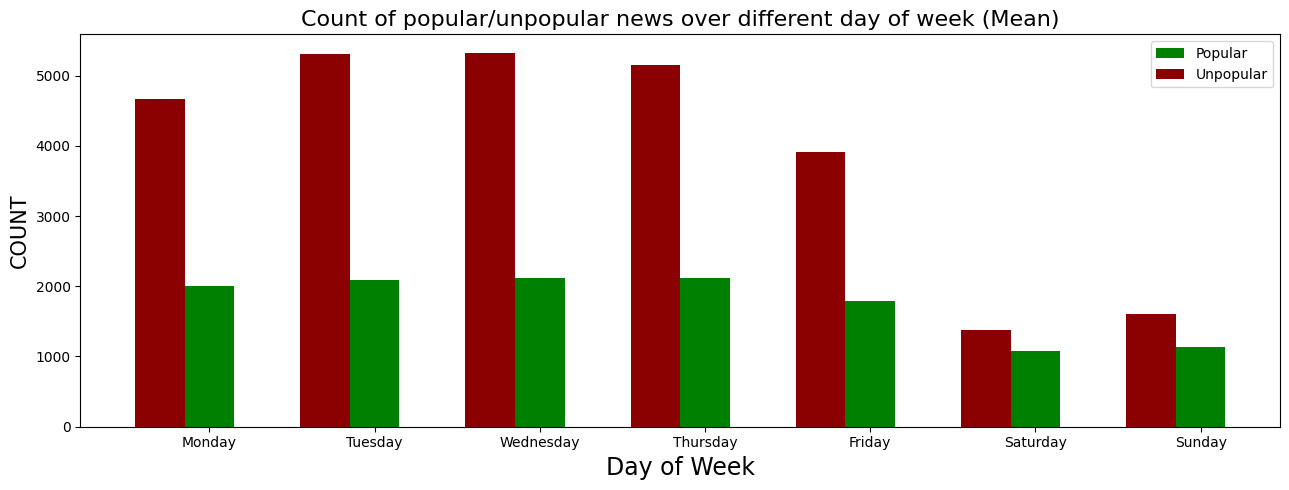

In [ ]:
Unpopular = news[news[' shares']< a]
Popular = news[news[' shares']>= a]
Unp_day = Unpopular[Wday].sum().values
Pop_day = Popular[Wday].sum().values

fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different day of week (Mean)", fontsize = 16)

plt.bar(np.arange(len(Wday)),Pop_day,width=0.3,align='center',color='g',label='Popular')
plt.bar(np.arange(len(Wday))-0.3,Unp_day,width=0.3,align='center',color='#8b0000',label='Unpopular')

plt.xticks(np.arange(7), ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'),rotation = 'horizontal')

plt.ylabel('COUNT',fontsize=15)
plt.xlabel('Day of Week',fontsize=17)

plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

In [ ]:
Dchan=news.columns[13:19]
Dchan

Index([' data_channel_is_lifestyle', ' data_channel_is_entertainment',
       ' data_channel_is_bus', ' data_channel_is_socmed',
       ' data_channel_is_tech', ' data_channel_is_world'],
      dtype='object')

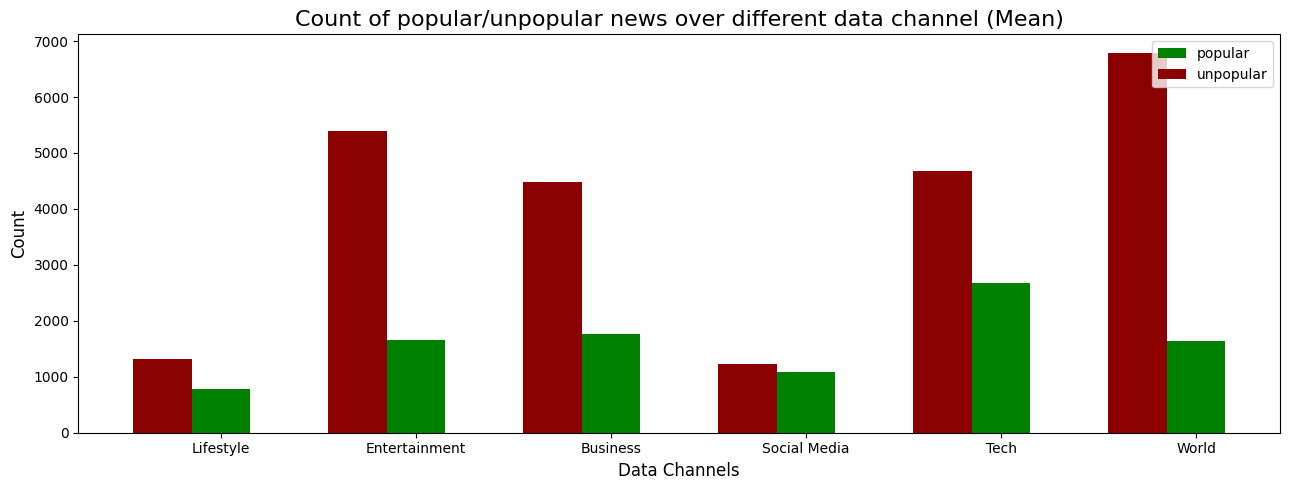

In [ ]:
Unpop3=news[news[' shares']<a]
Pop3=news[news[' shares']>=a]
Unpop_day3 = Unpop3[Dchan].sum().values
Pop_day3 = Pop3[Dchan].sum().values
fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different data channel (Mean)", fontsize = 16)
plt.bar(np.arange(len(Dchan)), Pop_day3, width = 0.3, align="center", color = 'g', \
          label = "popular")
plt.bar(np.arange(len(Dchan)) - 0.3, Unpop_day3, width = 0.3, align = "center", color = '#8b0000', \
          label = "unpopular")
plt.xticks(np.arange(len(Dchan)), Dchan)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Data Channels", fontsize = 12)
plt.xticks(np.arange(6), ('Lifestyle', 'Entertainment', 'Business', 'Social Media', 'Tech', 'World'),rotation = 'horizontal')
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

<Axes: xlabel='bin_shares,labelbin_shares'>

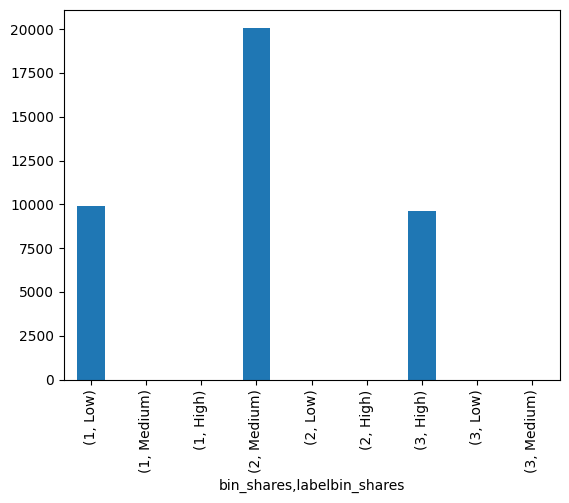

In [ ]:
#Target Distribution

news['labelbin_shares'] = pd.cut(news[' shares'], 
                                bins=[0,946,2800,843300], 
                              labels=['Low','Medium','High'])

news['bin_shares'] = pd.cut(news[' shares'], 
                           bins=[0,946,2800,843300], 
                           labels=[1,2,3])

# Visualization of Target Distribution
news.groupby('bin_shares').labelbin_shares.value_counts().plot.bar()

In [ ]:
news.replace([np.inf, -np.inf], np.nan, inplace=True)


In [ ]:
n=news.isna().sum()
n[n>0]

 num_imgs    6987
dtype: int64

In [ ]:
news.fillna(news.mean(), inplace=True)

<ipython-input-175-99a63ad0c87d>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  news.fillna(news.mean(), inplace=True)


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


X = news.drop(columns=['labelbin_shares',' shares','bin_shares', 'url'])
y = news['bin_shares']    


# Create an SelectKBest object to select features with two best ANOVA F-Values
f_selector = SelectKBest(f_classif, k=21)

# Apply the SelectKBest object to the features and target
X_best = f_selector.fit_transform(X, y)

print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_best.shape[1])
print('\n')

mask = f_selector.get_support() #list of booleans
selectedFeatures = [] # The list of your K best features

for bool, feature in zip(mask, X.columns.values):
    if bool:
        selectedFeatures.append(feature)

print(selectedFeatures)

Original number of features: 59
Reduced number of features: 21


[' num_hrefs', ' num_imgs', ' data_channel_is_entertainment', ' data_channel_is_socmed', ' data_channel_is_tech', ' data_channel_is_world', ' kw_max_min', ' kw_avg_min', ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares', ' self_reference_max_shares', ' self_reference_avg_sharess', ' weekday_is_saturday', ' weekday_is_sunday', ' is_weekend', ' LDA_02', ' LDA_03', ' LDA_04', ' global_subjectivity']


<BarContainer object of 21 artists>

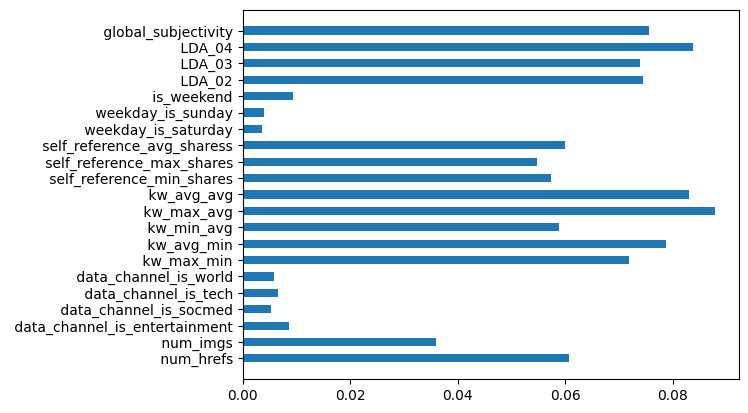

In [ ]:
X = news[selectedFeatures]
Y = news['bin_shares']  

rfc = ensemble.RandomForestClassifier(n_estimators=100)

#Fitting the model
rfc.fit(X,Y)

importantFeatures = {}
for feature,importance in zip(selectedFeatures,rfc.feature_importances_):
    importantFeatures[feature] = importance
    #print(feature,importance)

plt.barh(selectedFeatures,rfc.feature_importances_,height=.5)

In [ ]:
#Those features that are less important will be removed
remove = [' data_channel_is_socmed', ' data_channel_is_tech', ' data_channel_is_world',' weekday_is_saturday',' weekday_is_sunday']
for remove in remove:
    selectedFeatures.remove(remove)

# SVM

In [ ]:
from sklearn.svm import SVC

X = news[selectedFeatures]
Y = news[' shares'] 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

svc = SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

svc = svc.fit(X_train,y_train)


In [ ]:
predict = svc.predict(X_test)

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)
imputer = imputer.fit(X.iloc[:, 1:3])
X.iloc[:, 1:3] = imputer.transform(X.iloc[:, 1:3])

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=16)
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_predict)
cm

In [ ]:
score = svc.score(X_train, y_train)
print("SVC Score is:", score)

SVC Score is: 0.9879639639639639


In [ ]:
accu_score = round(metrics.accuracy_score(y_test, predict),4)
print(accu_score)

0.1032


Text(0.5, 464.0912077294686, 'Predicted Value')

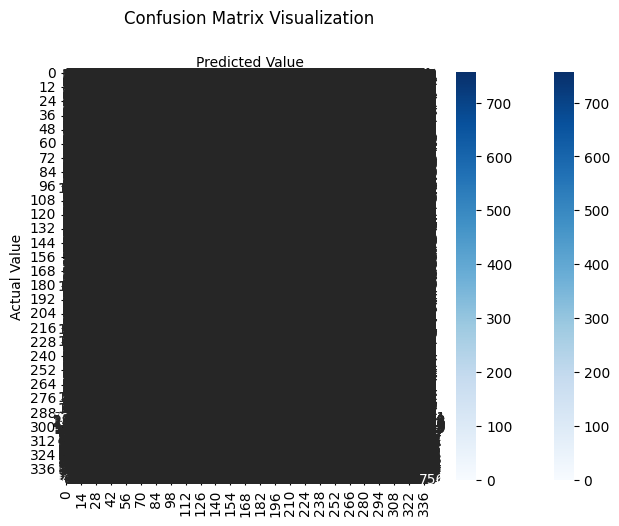

In [ ]:
import seaborn as sns

class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cm), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()


labels = ['True Pos\n\n\n','False Pos\n\n\n','False Neg\n\n\n','True Neg\n\n\n']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=True, fmt='', cmap='Blues')

plt.title('Confusion Matrix Visualization', y=1.1)
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=16)
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_predict)
cm

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[   0, 2879,   77],
       [   0, 5892,  166],
       [   0, 2753,  127]])

In [ ]:
target_names = ['Low','Medium','High']
print(classification_report(y_test, predict, target_names=target_names))

ValueError: ignored

In [ ]:
results = pd.DataFrame(columns = ['Model' , 'Model_score', 'Accuracy_score'])

In [ ]:
results = results.append({'Model': 'SVC', 'Model_score': score, 
                          'Accuracy_score': accu_score ,'features_group':1},
                        ignore_index=True)

<ipython-input-182-30517ddd5146>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': 'SVC', 'Model_score': score,


In [ ]:
print('There are {} samples in the training set and {} samples in the test set'.format(
X_train.shape[0], X_test.shape[0]))

There are 27750 samples in the training set and 11894 samples in the test set


# k-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

X = news[selectedFeatures]
Y = news['bin_shares'] 

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
#X_train, X_test, y_train, y_test
from sklearn.metrics import accuracy_score
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.408189  , 0.40507819, 0.40978645, 0.43854044, 0.44240794,
       0.44728435, 0.45510341, 0.46191357, 0.45737347])

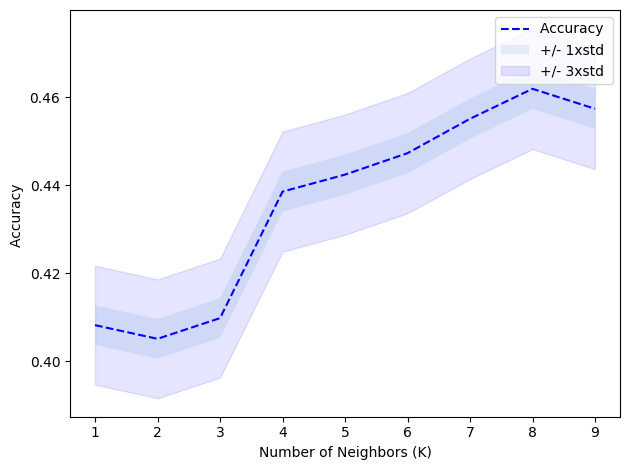

The best accuracy was 0.4619135698671599 with k= 8


In [ ]:
plt.plot(range(1,Ks),mean_acc,'b--')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="blue")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [ ]:
# Predicting the Test set results
y_pred = knn.predict(X_test)

In [ ]:
knn_score = round(knn.score(X_train,y_train),4)
print('Train Accuracy Score:',knn_score)

Train Accuracy Score: 0.5817


In [ ]:
accu_score = metrics.accuracy_score(y_test, y_pred)
print("Test Accuracy Score:",accu_score)

Test Accuracy Score: 0.4573734656129141


In [ ]:
results = results.append({'Model': 'KNN', 'Model_score': knn_score, 
                          'Accuracy_score': accu_score ,'features_group':1},
                        ignore_index=True)

<ipython-input-199-dba0232cc0fd>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': 'KNN', 'Model_score': knn_score,


# DecsionTree Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
import plotly.express as px

X = news[selectedFeatures]
Y = news['bin_shares'] 

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

dtc = DecisionTreeClassifier(criterion="entropy", max_depth=3)
dtc = dtc.fit(X_train,y_train)
y_predict = dtc.predict(X_test)

accu_score = metrics.accuracy_score(y_test, y_predict)
print("Accuracy:", accu_score)

Accuracy: 0.5093324365226164


In [ ]:
from six import StringIO
import pydotplus
from IPython.display import Image  
from sklearn.tree import export_graphviz

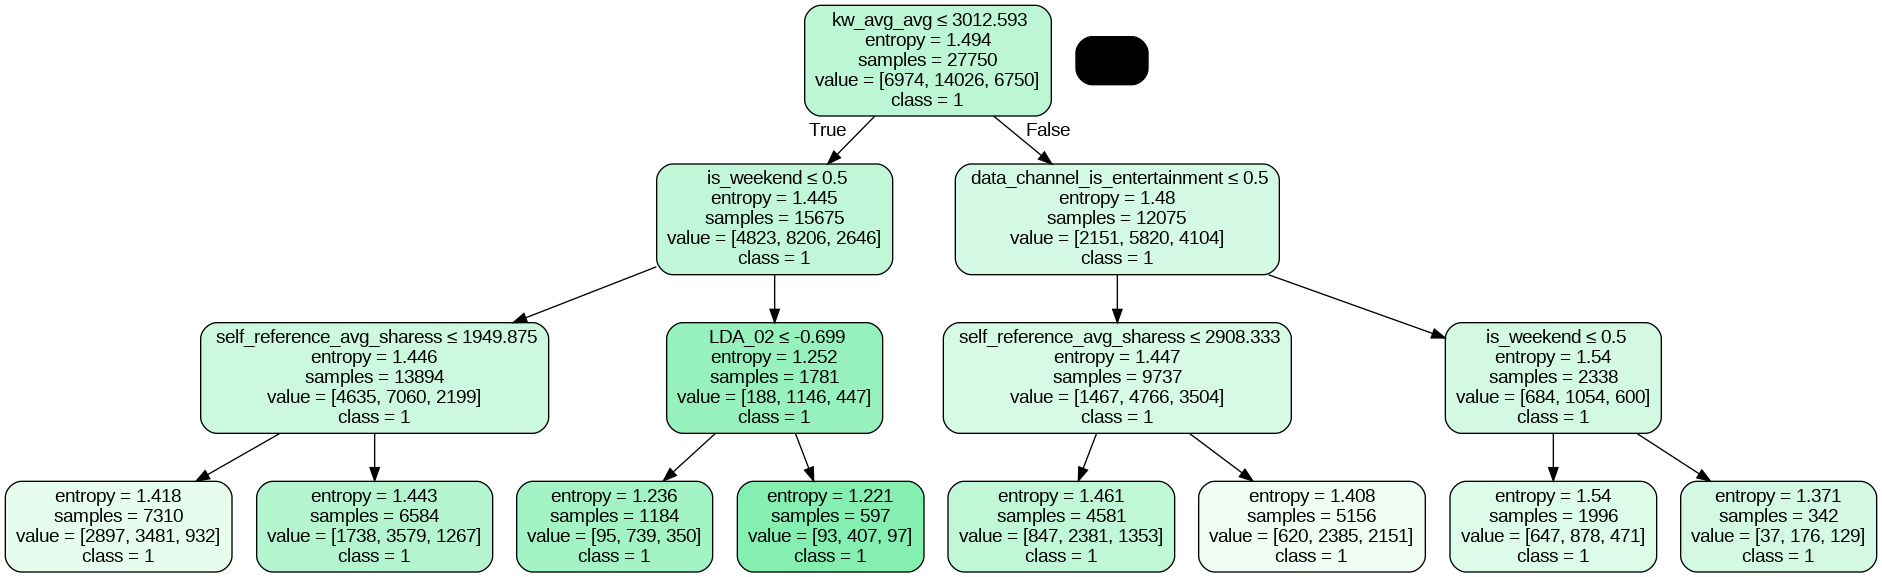

In [ ]:
dot_data = StringIO()

export_graphviz(dtc, out_file=dot_data,                  
filled=True, rounded=True,
special_characters=True, feature_names = selectedFeatures,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 

graph.write_png('sub.png')
Image(graph.create_png())

In [ ]:
dtc_score = round(dtc.score(X_train,y_train),4)
print(dtc_score)

0.5054


In [ ]:
results = results.append({'Model': 'Decision Tree', 'Model_score': dtc_score, 
                          'Accuracy_score': accu_score ,'features_group':1},
                        ignore_index=True)

<ipython-input-194-3427e2b140b8>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': 'Decision Tree', 'Model_score': dtc_score,


In [ ]:
results